In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250

# CocaCola Sales Dataset

In [23]:
Cocacola = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

In [24]:
Cocacola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [113]:
Cocacola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Quarter    42 non-null     object 
 1   Sales      42 non-null     float64
 2   Quarters   42 non-null     object 
 3   Year       42 non-null     int64  
 4   Q1         42 non-null     uint8  
 5   Q2         42 non-null     uint8  
 6   Q3         42 non-null     uint8  
 7   Q4         42 non-null     uint8  
 8   t          42 non-null     int32  
 9   t_squared  42 non-null     int32  
 10  log_sales  42 non-null     float64
dtypes: float64(2), int32(2), int64(1), object(2), uint8(4)
memory usage: 2.3+ KB


In [7]:
Cocacola.shape

(42, 2)

In [27]:
Cocacola['Quarters'] = 0
Cocacola['Year'] = 0
for i in range(42):
    p = Cocacola["Quarter"][i]
    Cocacola['Quarters'][i]= p[0:2]
    Cocacola['Year'][i]= p[3:5]

In [28]:
Cocacola.head()

,Quarter,Sales,Quarters,Year
0,Q1_86,1734.827000,Q1,86
1,Q2_86,2244.960999,Q2,86
2,Q3_86,2533.804993,Q3,86
3,Q4_86,2154.962997,Q4,86
4,Q1_87,1547.818996,Q1,87


### Creating dummy variables

In [29]:
Quarters_Dummies = pd.DataFrame(pd.get_dummies(Cocacola['Quarters']))
Cocacola = pd.concat([Cocacola,Quarters_Dummies],axis = 1)
Cocacola.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,86,1,0,0,0
1,Q2_86,2244.960999,Q2,86,0,1,0,0
2,Q3_86,2533.804993,Q3,86,0,0,1,0
3,Q4_86,2154.962997,Q4,86,0,0,0,1
4,Q1_87,1547.818996,Q1,87,1,0,0,0


## Visualization

<AxesSubplot:>

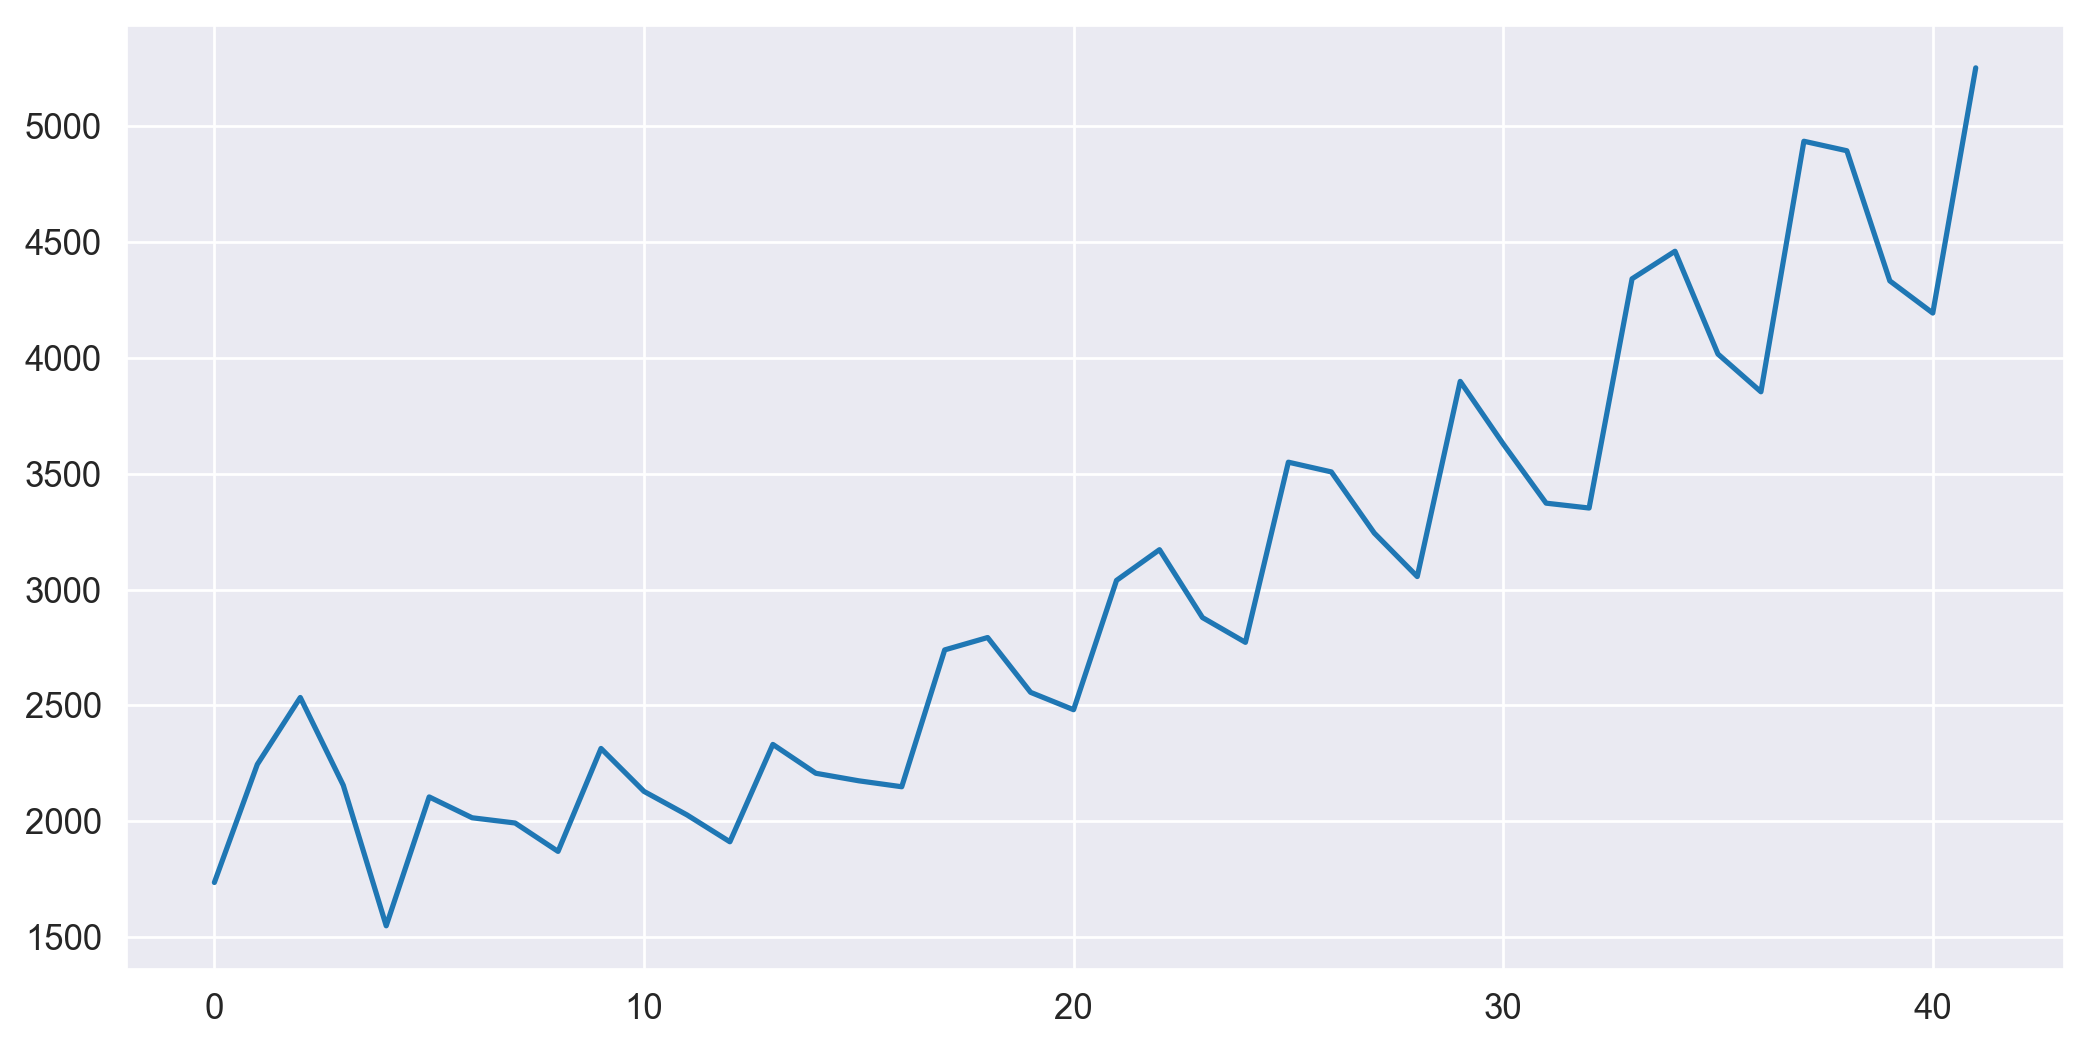

In [31]:
Cocacola.Sales.plot()

<AxesSubplot:xlabel='Quarters', ylabel='Sales'>

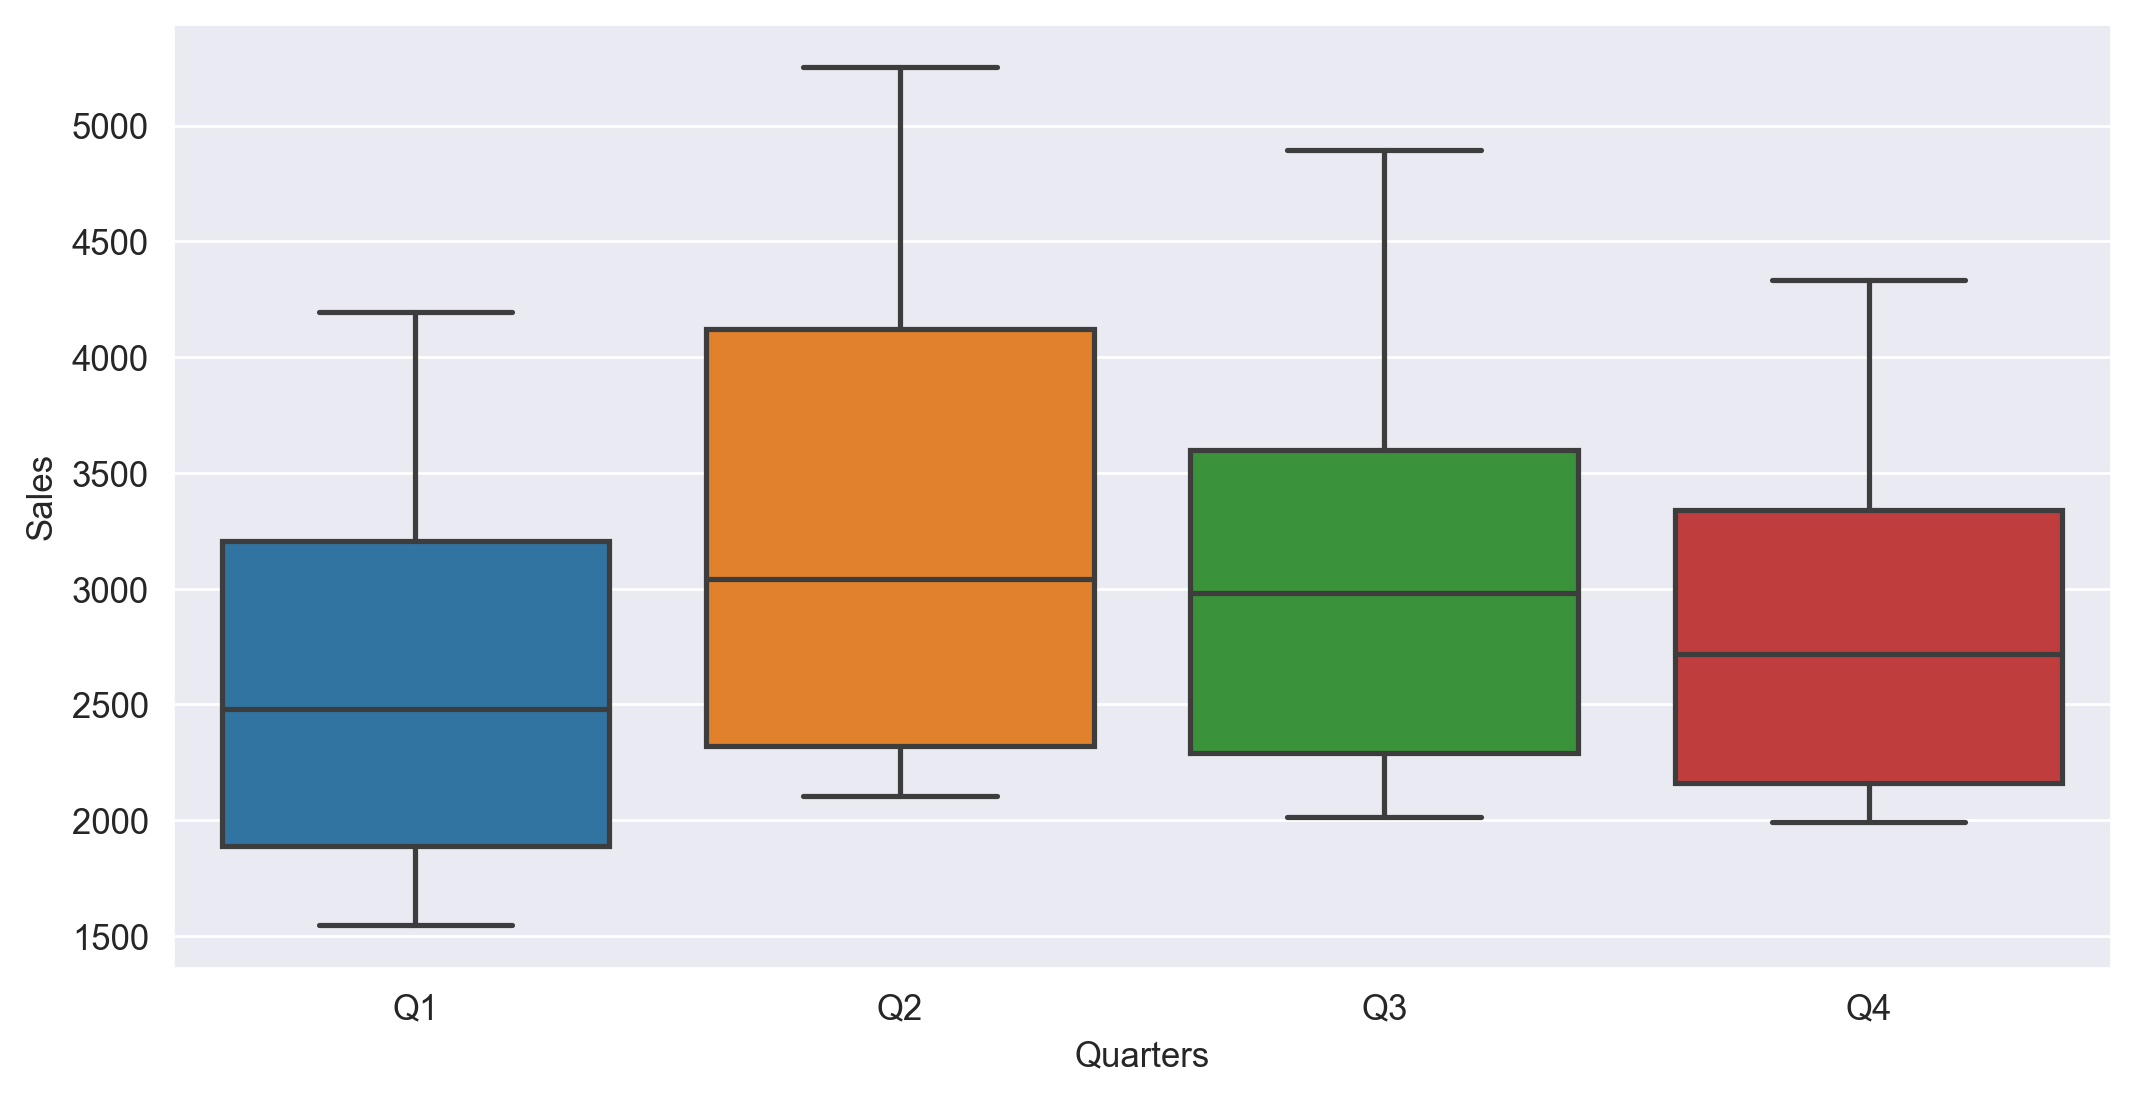

In [32]:
sns.boxplot(x="Quarters",y="Sales",data=Cocacola)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

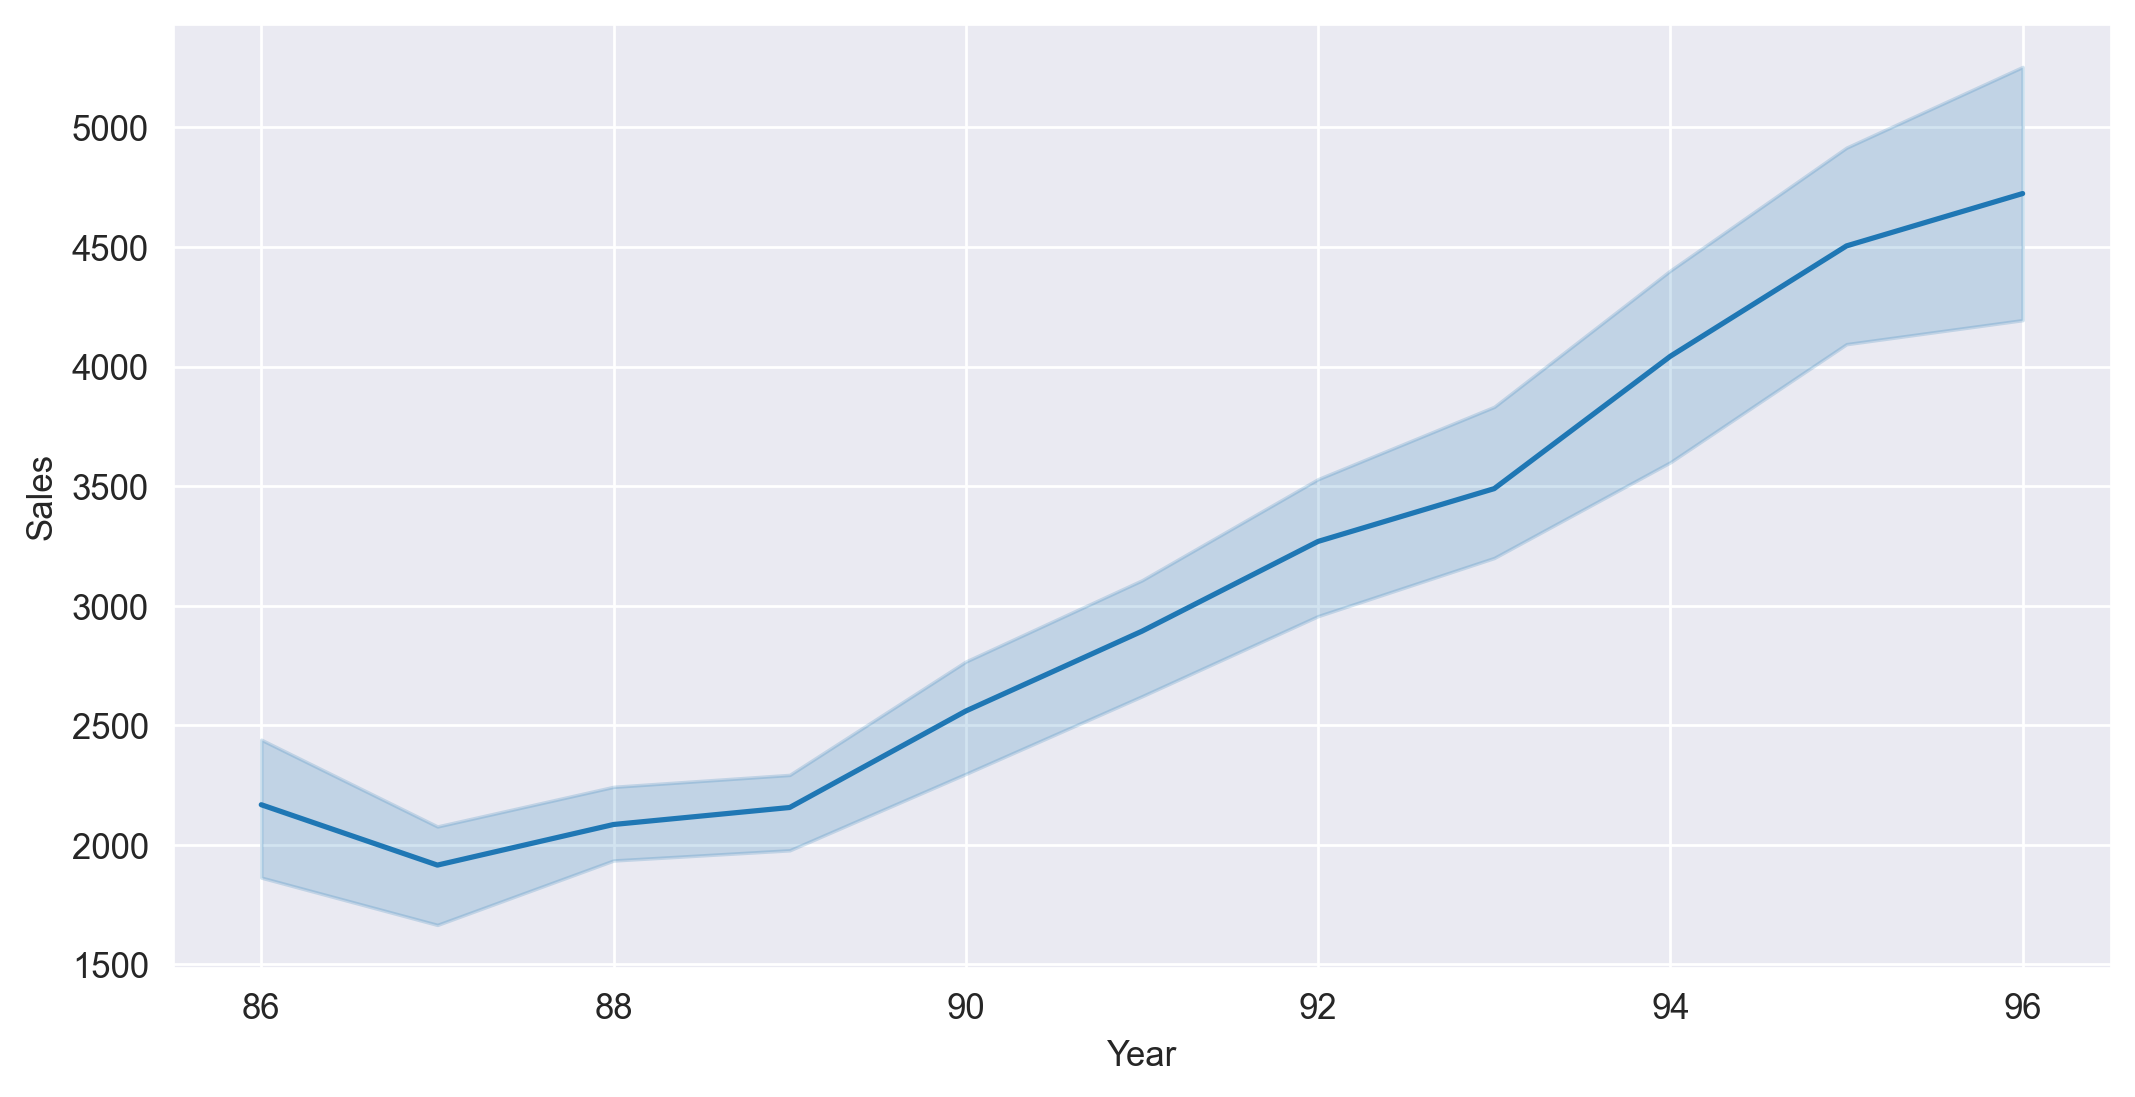

In [33]:
sns.lineplot(x="Year",y="Sales",data=Cocacola)

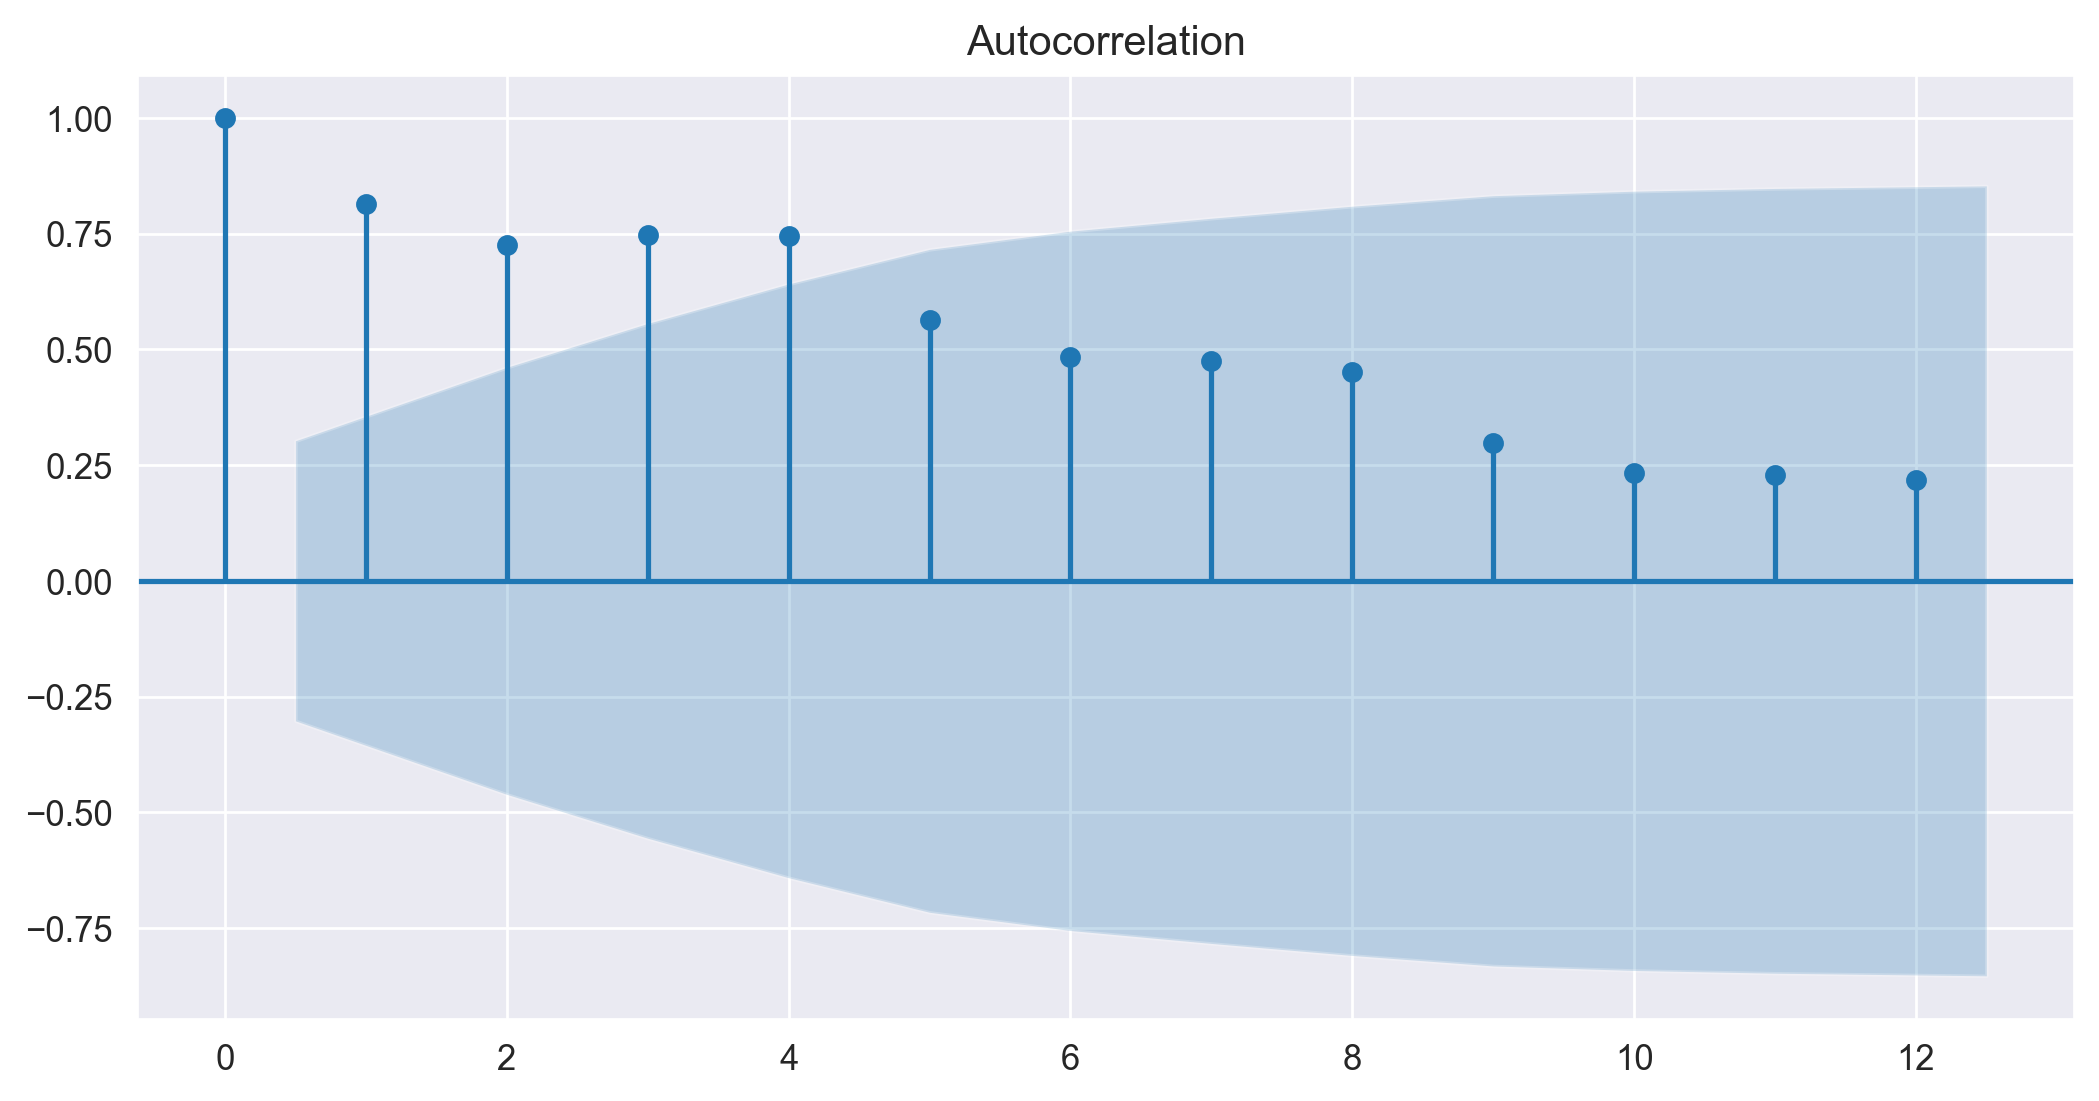

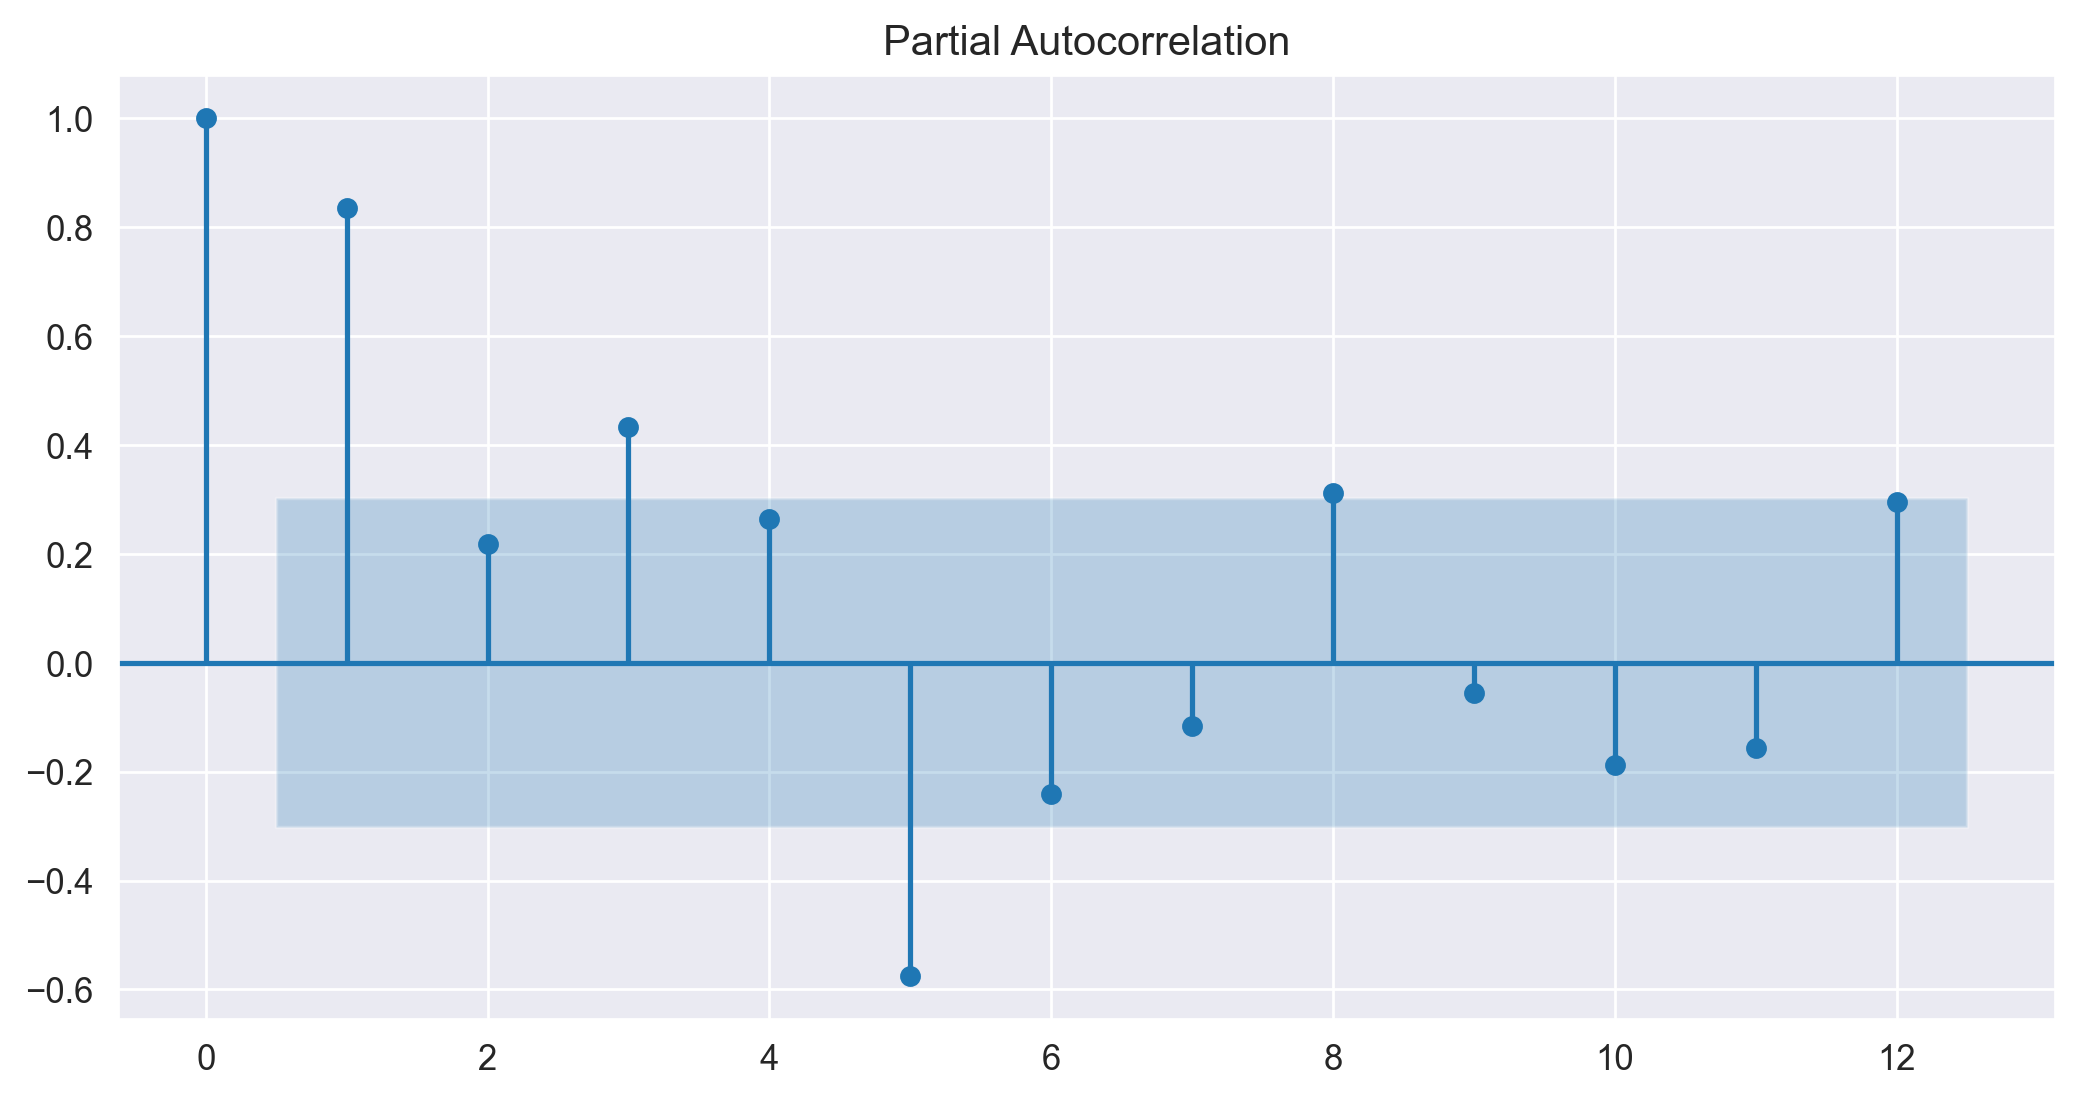

In [34]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Cocacola.Sales,lags=12)
tsa_plots.plot_pacf(Cocacola.Sales,lags=12)
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error

In [43]:
Cocacola["t"] = np.arange(1,43)
Cocacola["t_squared"] = Cocacola["t"]*Cocacola["t"]

Cocacola["log_sales"] = np.log(Cocacola["Sales"])

Cocacola.head()

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602


### Splitting the data

In [44]:
Train = Cocacola.head(32)
Test = Cocacola.tail(10)

In [45]:
Train

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
0,Q1_86,1734.827000,Q1,86,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,86,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,86,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,86,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,87,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,87,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,87,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,87,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,88,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,88,0,1,0,0,10,100,7.746574


In [46]:
Test

,Quarter,Sales,Quarters,Year,Q1,Q2,Q3,Q4,t,t_squared,log_sales
32,Q1_94,3352.0,Q1,94,1,0,0,0,33,1089,8.117312
33,Q2_94,4342.0,Q2,94,0,1,0,0,34,1156,8.376090
34,Q3_94,4461.0,Q3,94,0,0,1,0,35,1225,8.403128
35,Q4_94,4017.0,Q4,94,0,0,0,1,36,1296,8.298291
36,Q1_95,3854.0,Q1,95,1,0,0,0,37,1369,8.256867
37,Q2_95,4936.0,Q2,95,0,1,0,0,38,1444,8.504311
38,Q3_95,4895.0,Q3,95,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,Q4,95,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,Q1,96,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,Q2,96,0,1,0,0,42,1764,8.566555


### Model based Forecasting methods

In [47]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(mean_squared_error(Test['Sales'], pred_linear))
rmse_linear

752.9233932767115

In [50]:
#Exponential

Exp = smf.ols('log_sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(mean_squared_error(Test['Sales'], pred_Exp))
rmse_Exp

4387.940544839098

In [52]:
#Quadratic 

Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(mean_squared_error(Test['Sales'],pred_Quad))
rmse_Quad

457.73573554072897

In [53]:
#Additive seasonality 

add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(mean_squared_error(Test['Sales'], pred_add_sea))
rmse_add_sea

1850.4665461858358

In [57]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','Q4','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(mean_squared_error(Test['Sales'], pred_add_sea_quad))
rmse_add_sea_quad

277.35107711286446

In [58]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(mean_squared_error(Test['Sales'], pred_Mult_sea))
rmse_Mult_sea

4388.397233580229

In [59]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,277.351077
2,rmse_Quad,457.735736
0,rmse_linear,752.923393
3,rmse_add_sea,1850.466546
1,rmse_Exp,4387.940545
5,rmse_Mult_sea,4388.397234


### Moving Average

<AxesSubplot:>

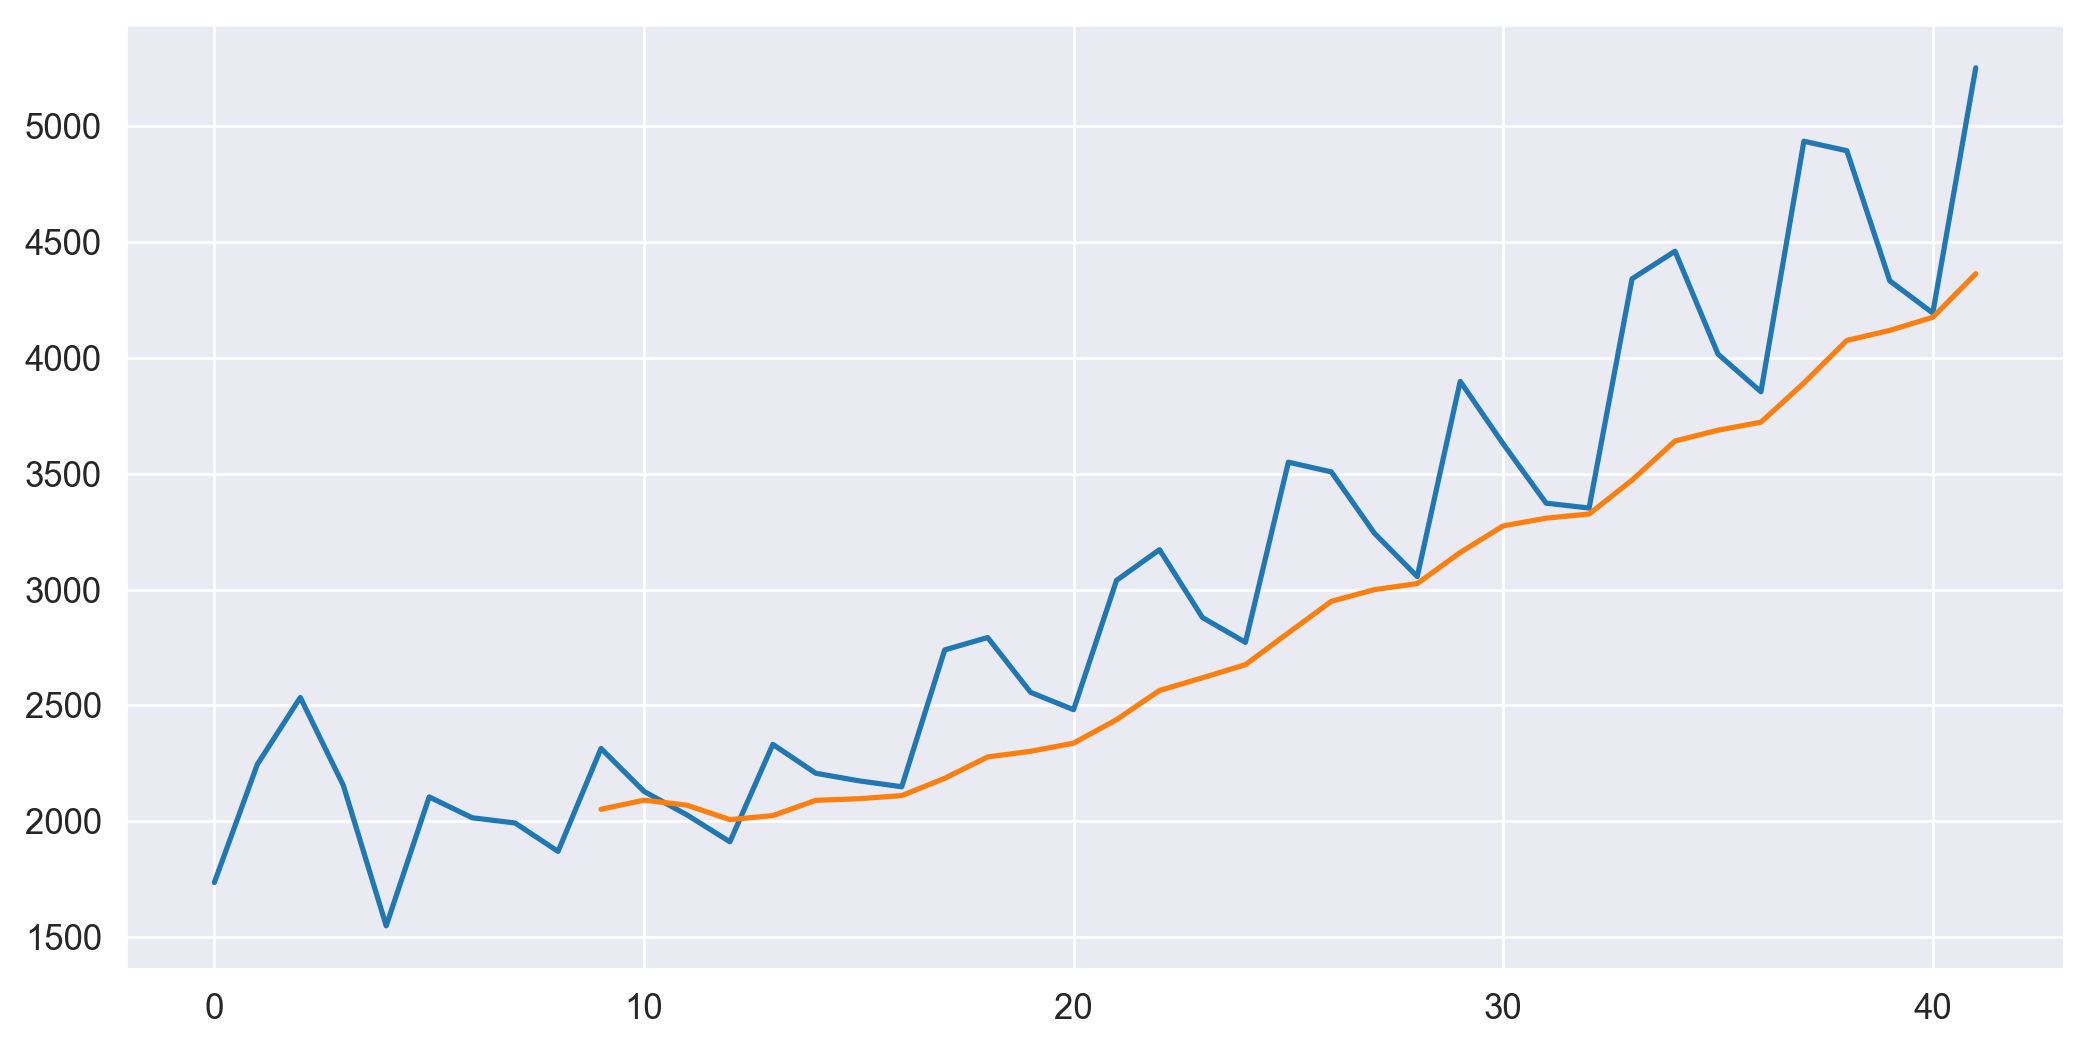

In [60]:
Cocacola['Sales'].plot()
Cocacola['Sales'].rolling(10).mean().plot()

###  Building final model with least RMSE value

In [73]:
final_model = smf.ols('Sales~t+t_squared+Q1+Q2+Q3+Q4',data=Cocacola).fit()
pred_final = pd.Series(final_model.predict(Cocacola[['Q1','Q2','Q3','Q4','t','t_squared']]))
rmse_final_model = np.sqrt(mean_squared_error(Cocacola['Sales'], pred_final))
rmse_final_model

159.05522576522472

In [74]:
pred_df = pd.DataFrame({'Actual' : Cocacola.Sales, 'Predicted' : pred_final})
pred_df

,Actual,Predicted
0,1734.827000,1626.592727
1,2244.960999,2268.402339
2,2533.804993,2189.685821
3,2154.962997,1867.242917
4,1547.818996,1658.311143
5,2104.411995,2314.185178
6,2014.362999,2249.533083
7,1991.746998,1941.154603
8,1869.049999,1746.287252
9,2313.631996,2416.225709


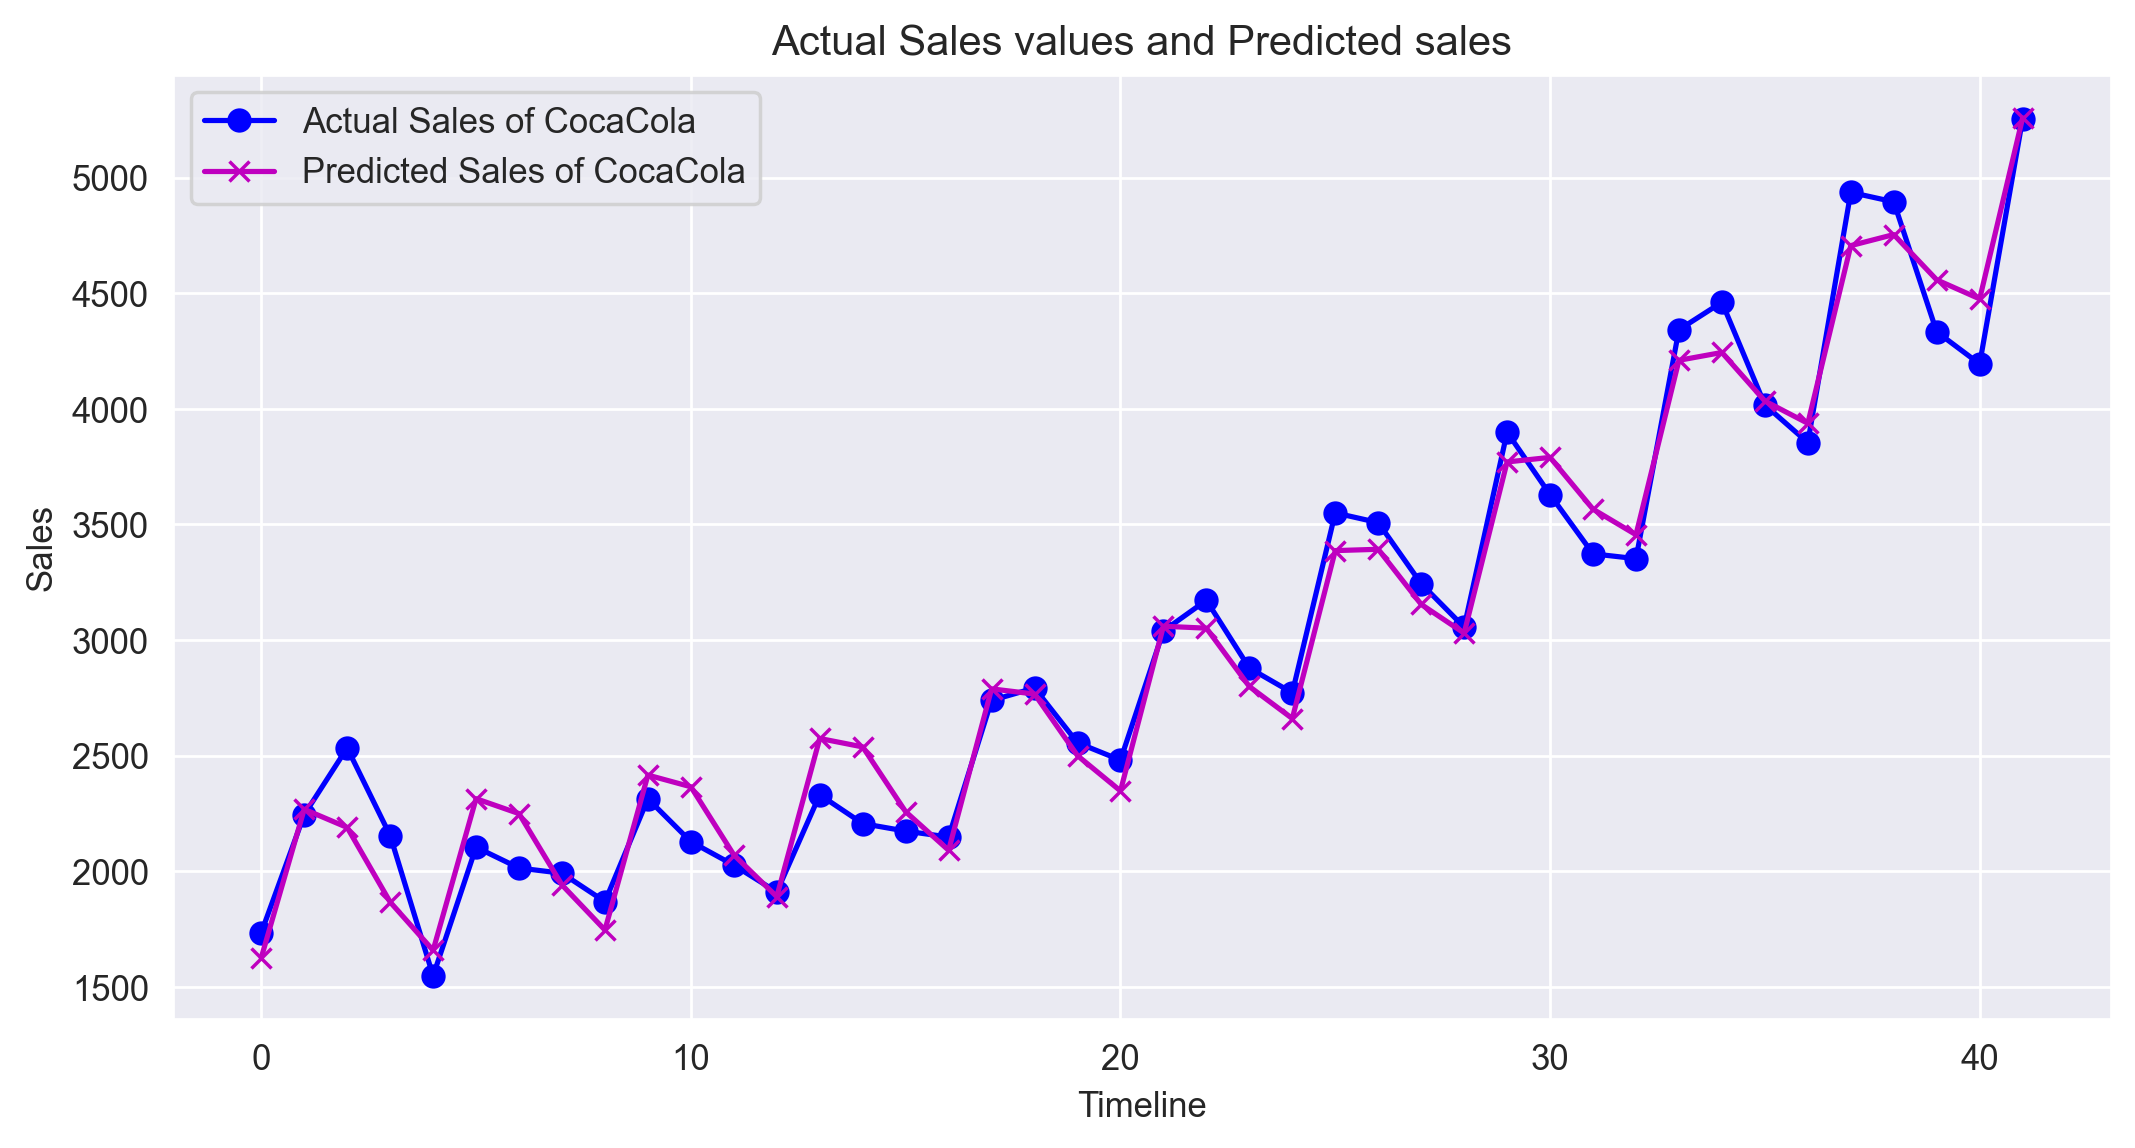

In [75]:
# Plot of Actual Sales values and Predicted sales values
plt.plot(Cocacola.Sales, color='b',marker='o', label='Actual Sales of CocaCola')
plt.plot(pred_final, color='m',marker='x', label='Predicted Sales of CocaCola')

# Added titles and adjust dimensions
plt.title('Actual Sales values and Predicted sales')
plt.xlabel("Timeline")
plt.ylabel("Sales")
plt.legend()
plt.rcParams['figure.figsize'] = (10,8) 

plt.show()

# Airlines Dataset

In [85]:
Airlines = pd.read_excel("Airlines+Data.xlsx")
Airlines.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [114]:
Airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Month           96 non-null     datetime64[ns]
 1   Passengers      96 non-null     int64         
 2   month           96 non-null     object        
 3   year            96 non-null     object        
 4   t               96 non-null     int32         
 5   t_squared       96 non-null     int32         
 6   log_Passengers  96 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(2)
memory usage: 4.6+ KB


In [86]:
Airlines.shape

(96, 2)

In [88]:
Airlines["month"] = Airlines.Month.dt.strftime("%b") 
Airlines["year"] = Airlines.Month.dt.strftime("%Y") 

In [89]:
Airlines.head()

,Month,Passengers,month,year
0,1995-01-01,112,Jan,1995
1,1995-02-01,118,Feb,1995
2,1995-03-01,132,Mar,1995
3,1995-04-01,129,Apr,1995
4,1995-05-01,121,May,1995


## Visualization

<AxesSubplot:>

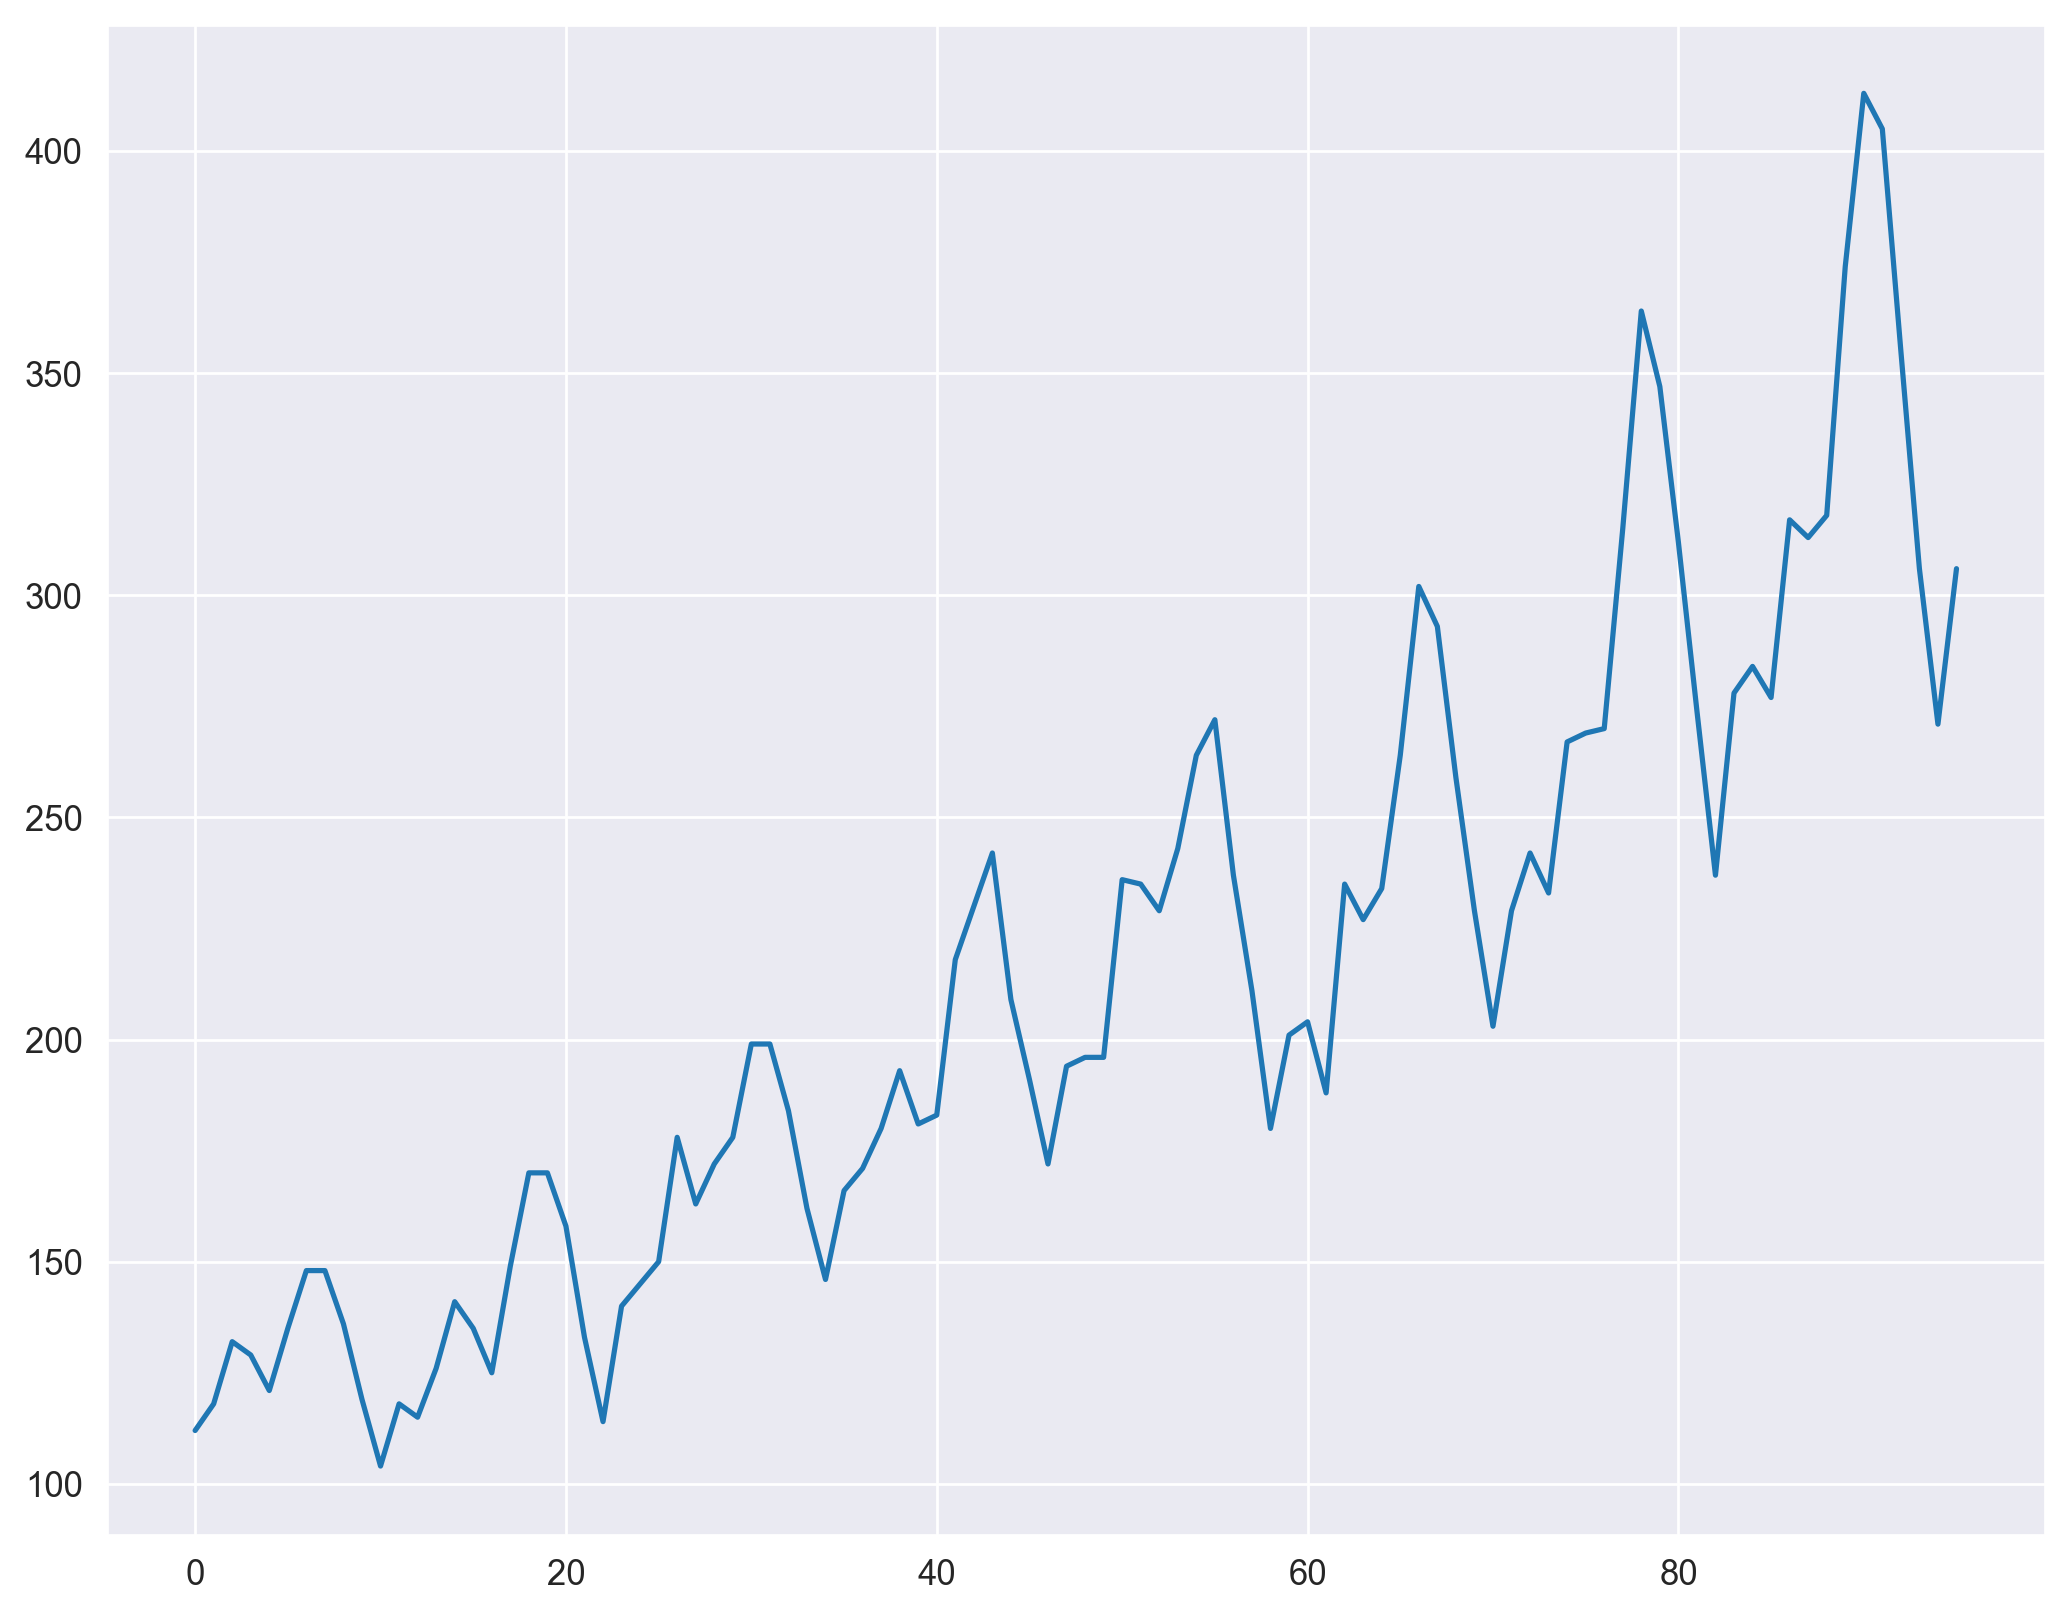

In [90]:
Airlines.Passengers.plot()

<AxesSubplot:xlabel='month', ylabel='Passengers'>

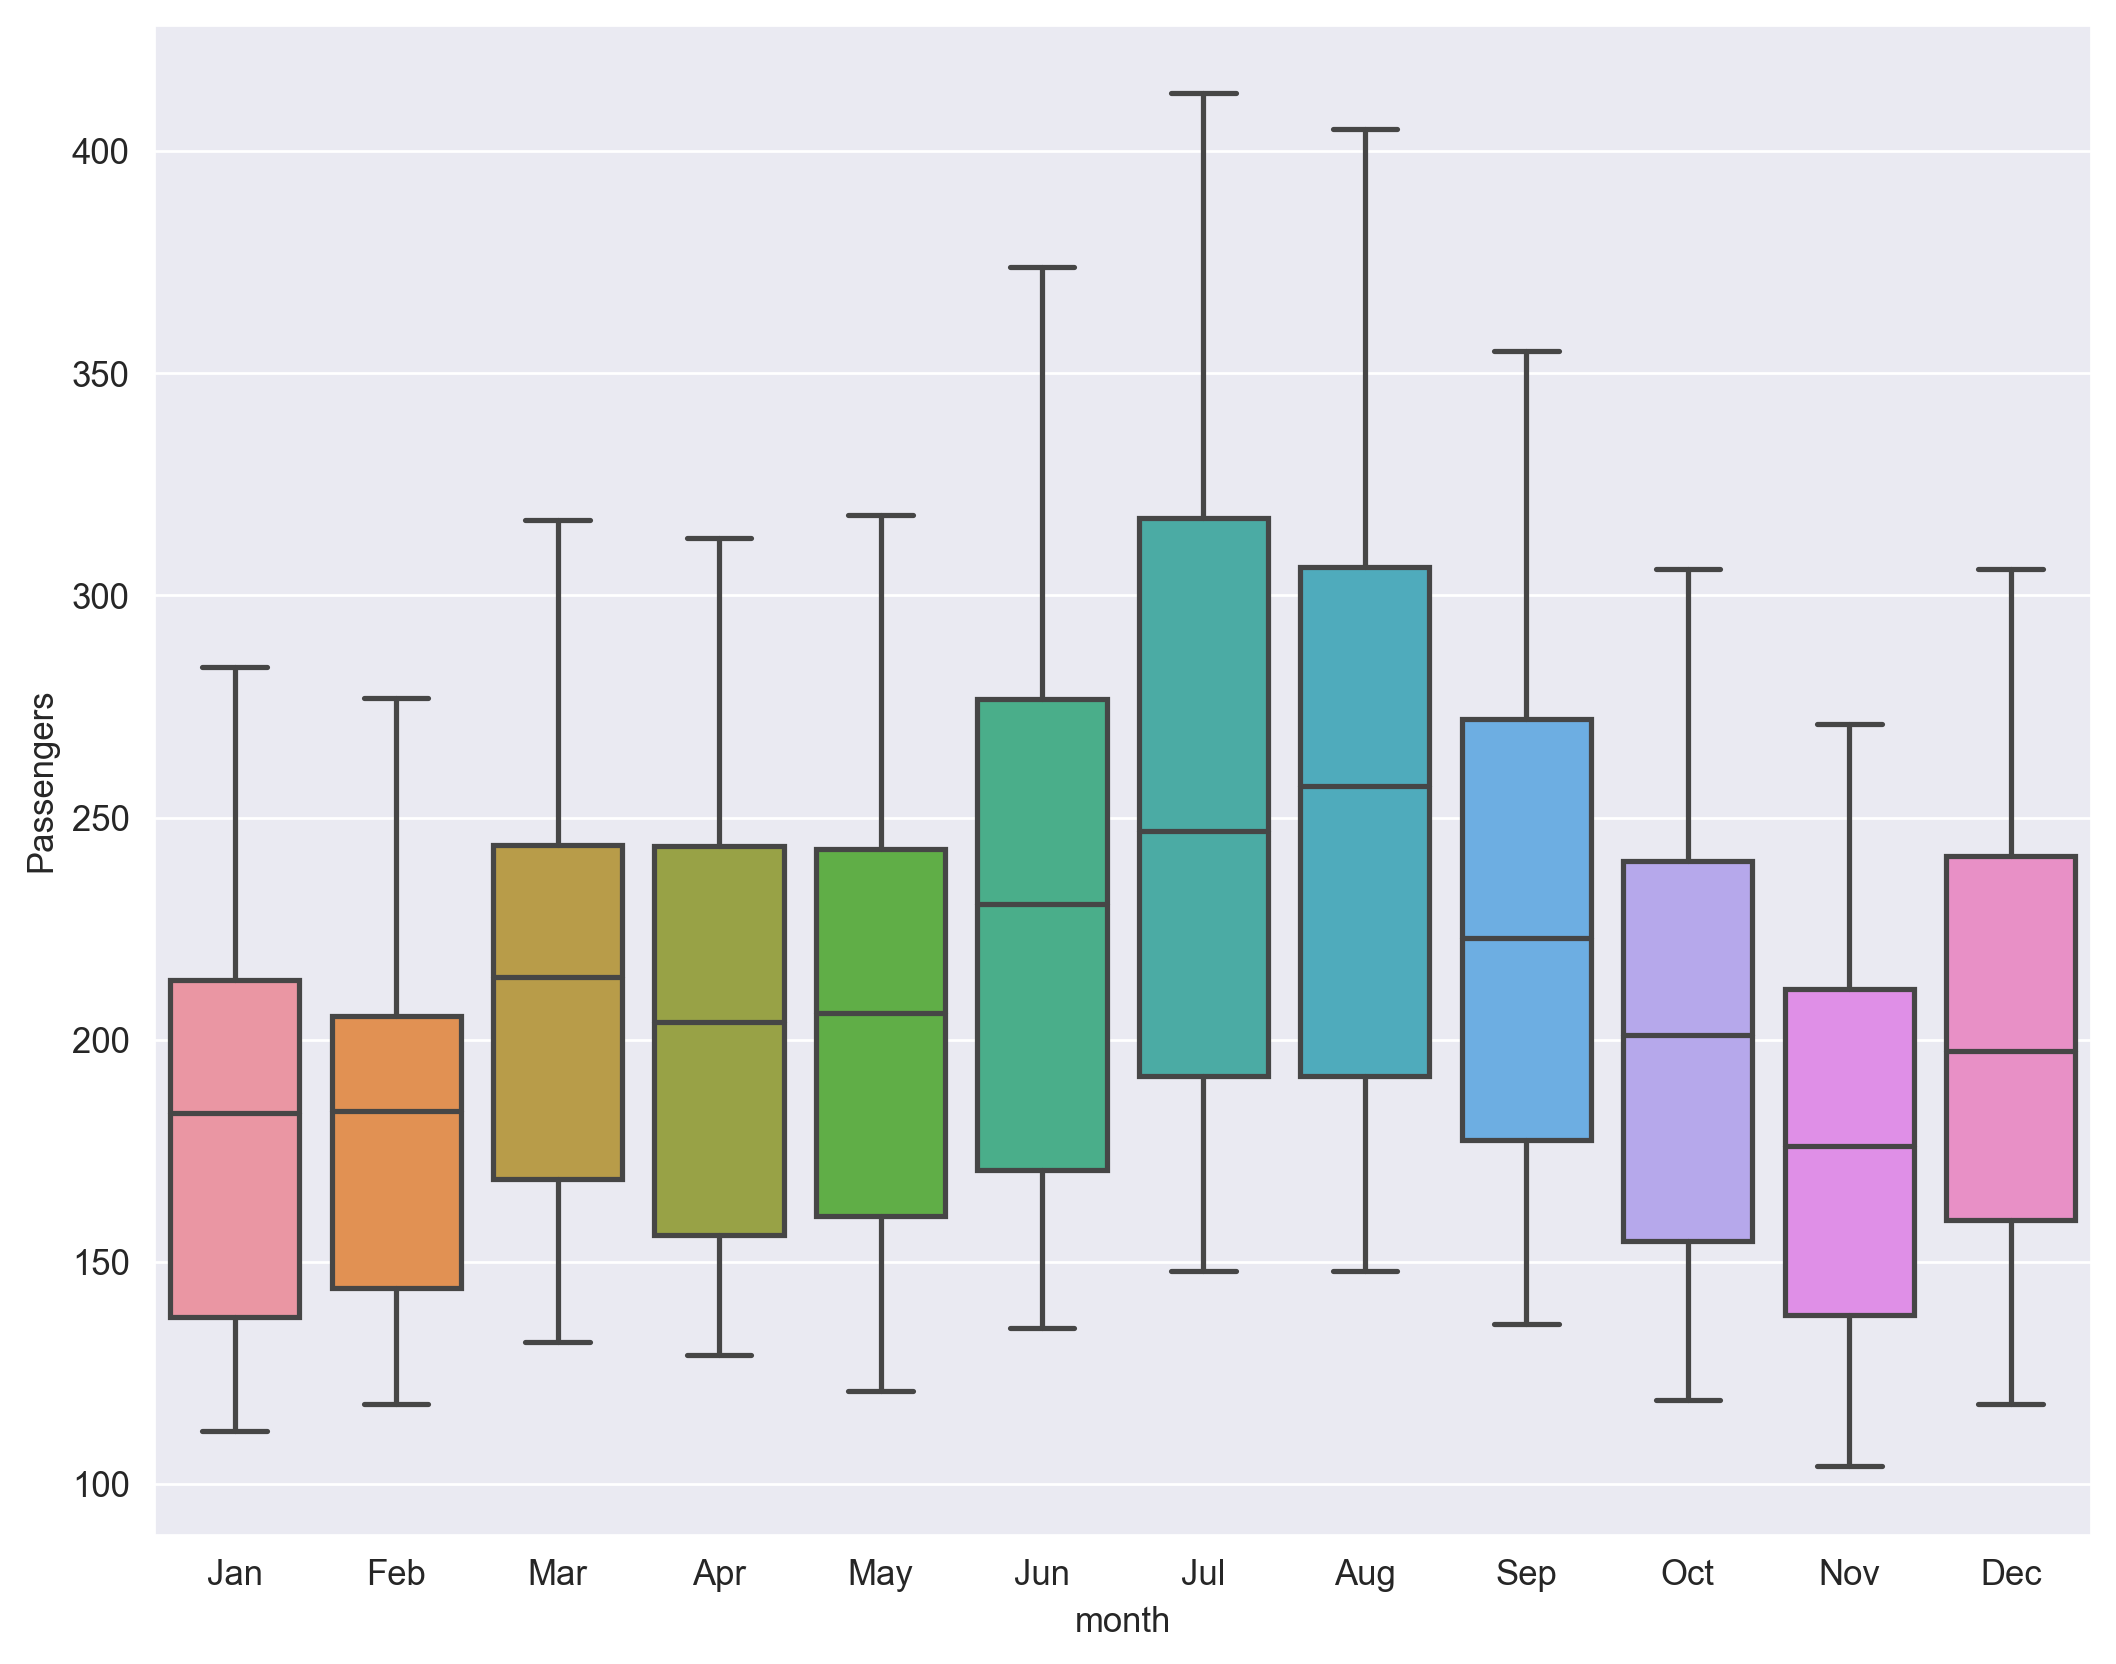

In [91]:
sns.boxplot(x="month",y="Passengers",data=Airlines)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

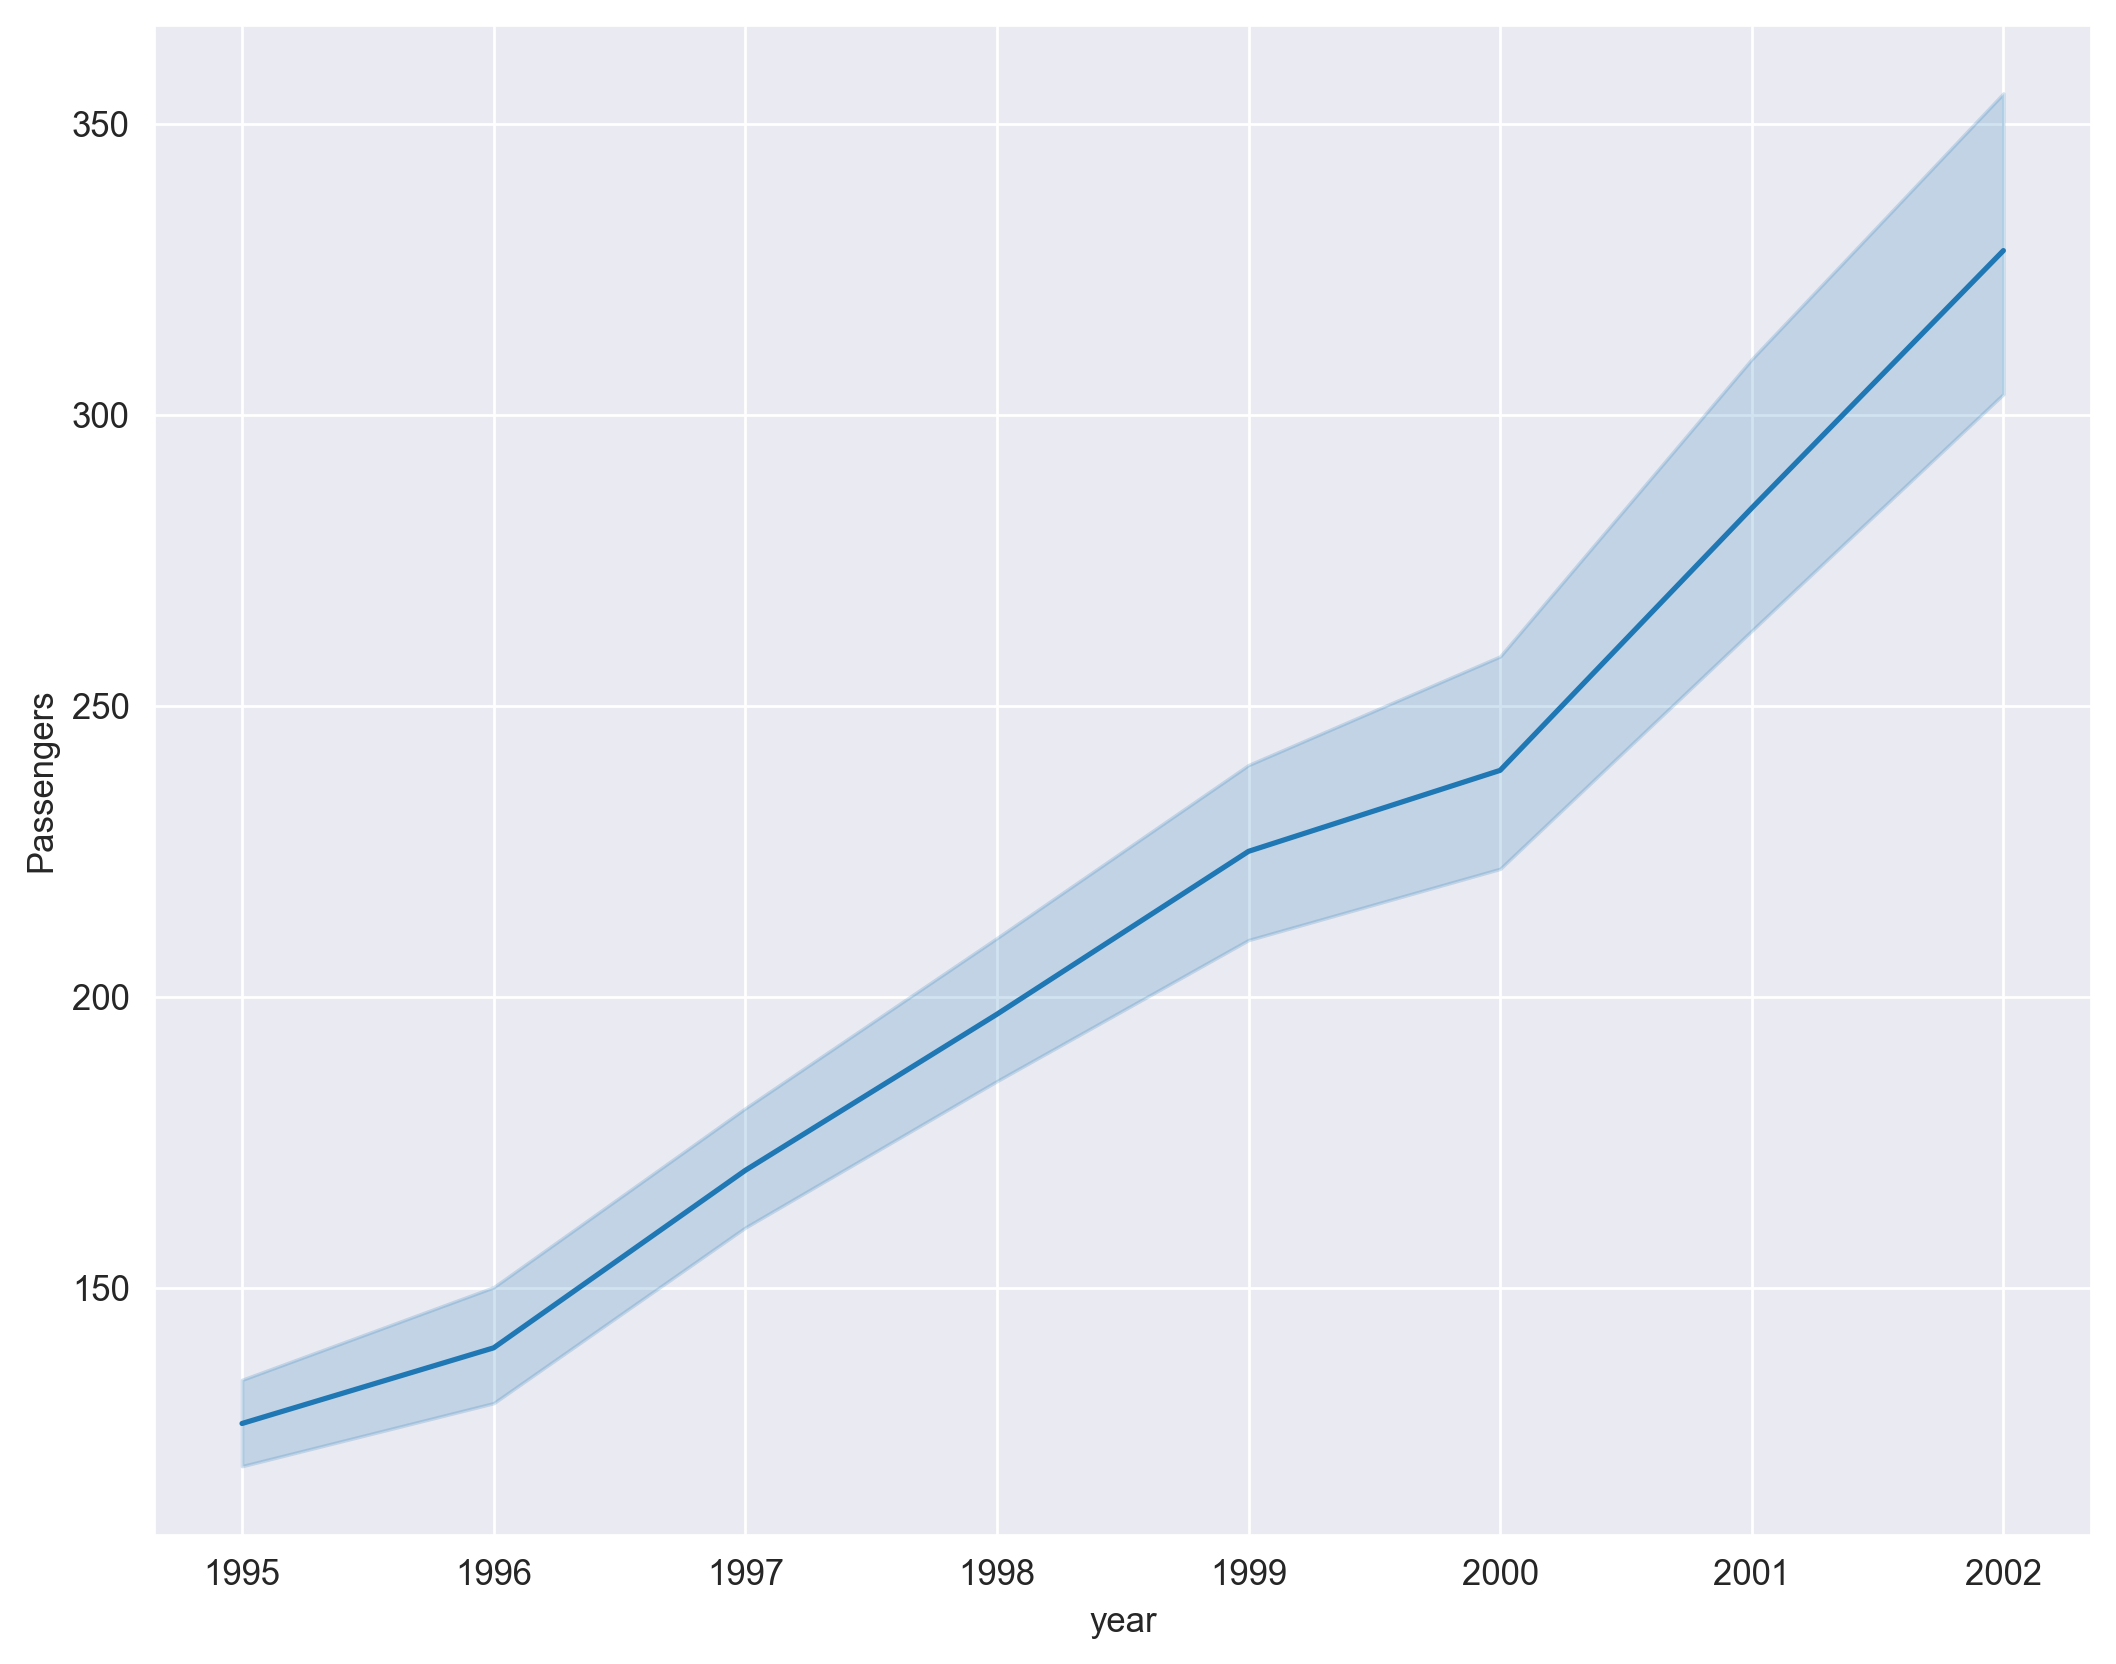

In [92]:
sns.lineplot(x="year",y="Passengers",data=Airlines)

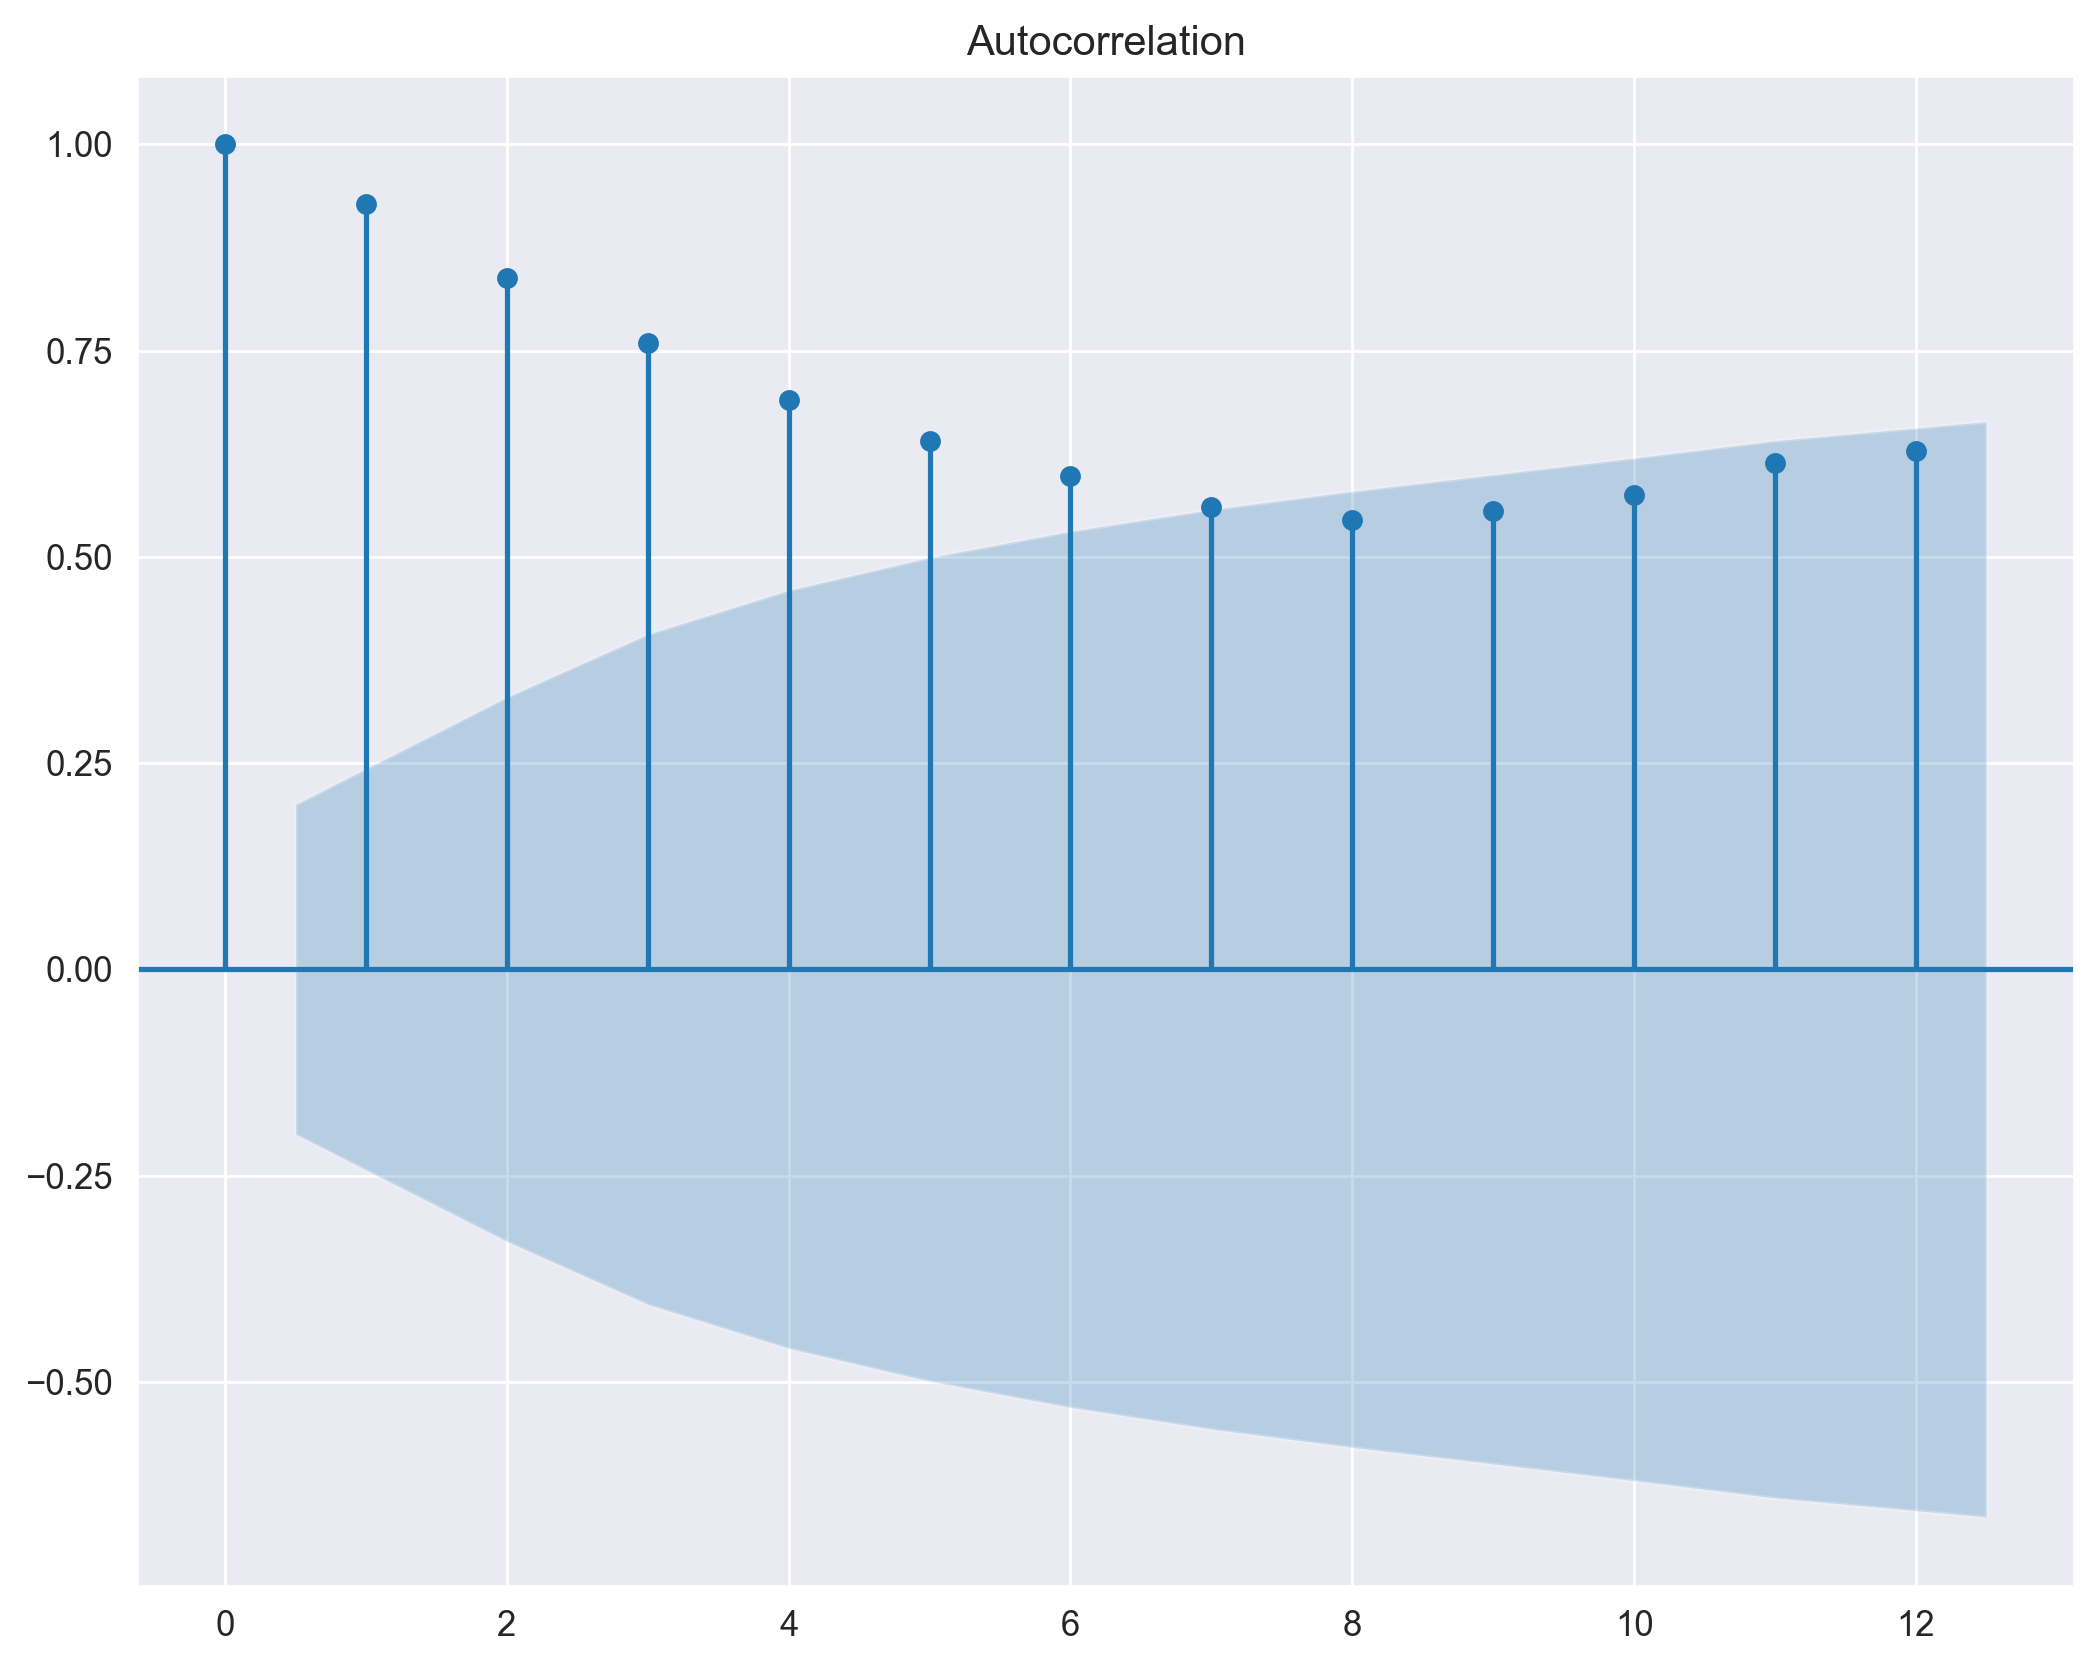

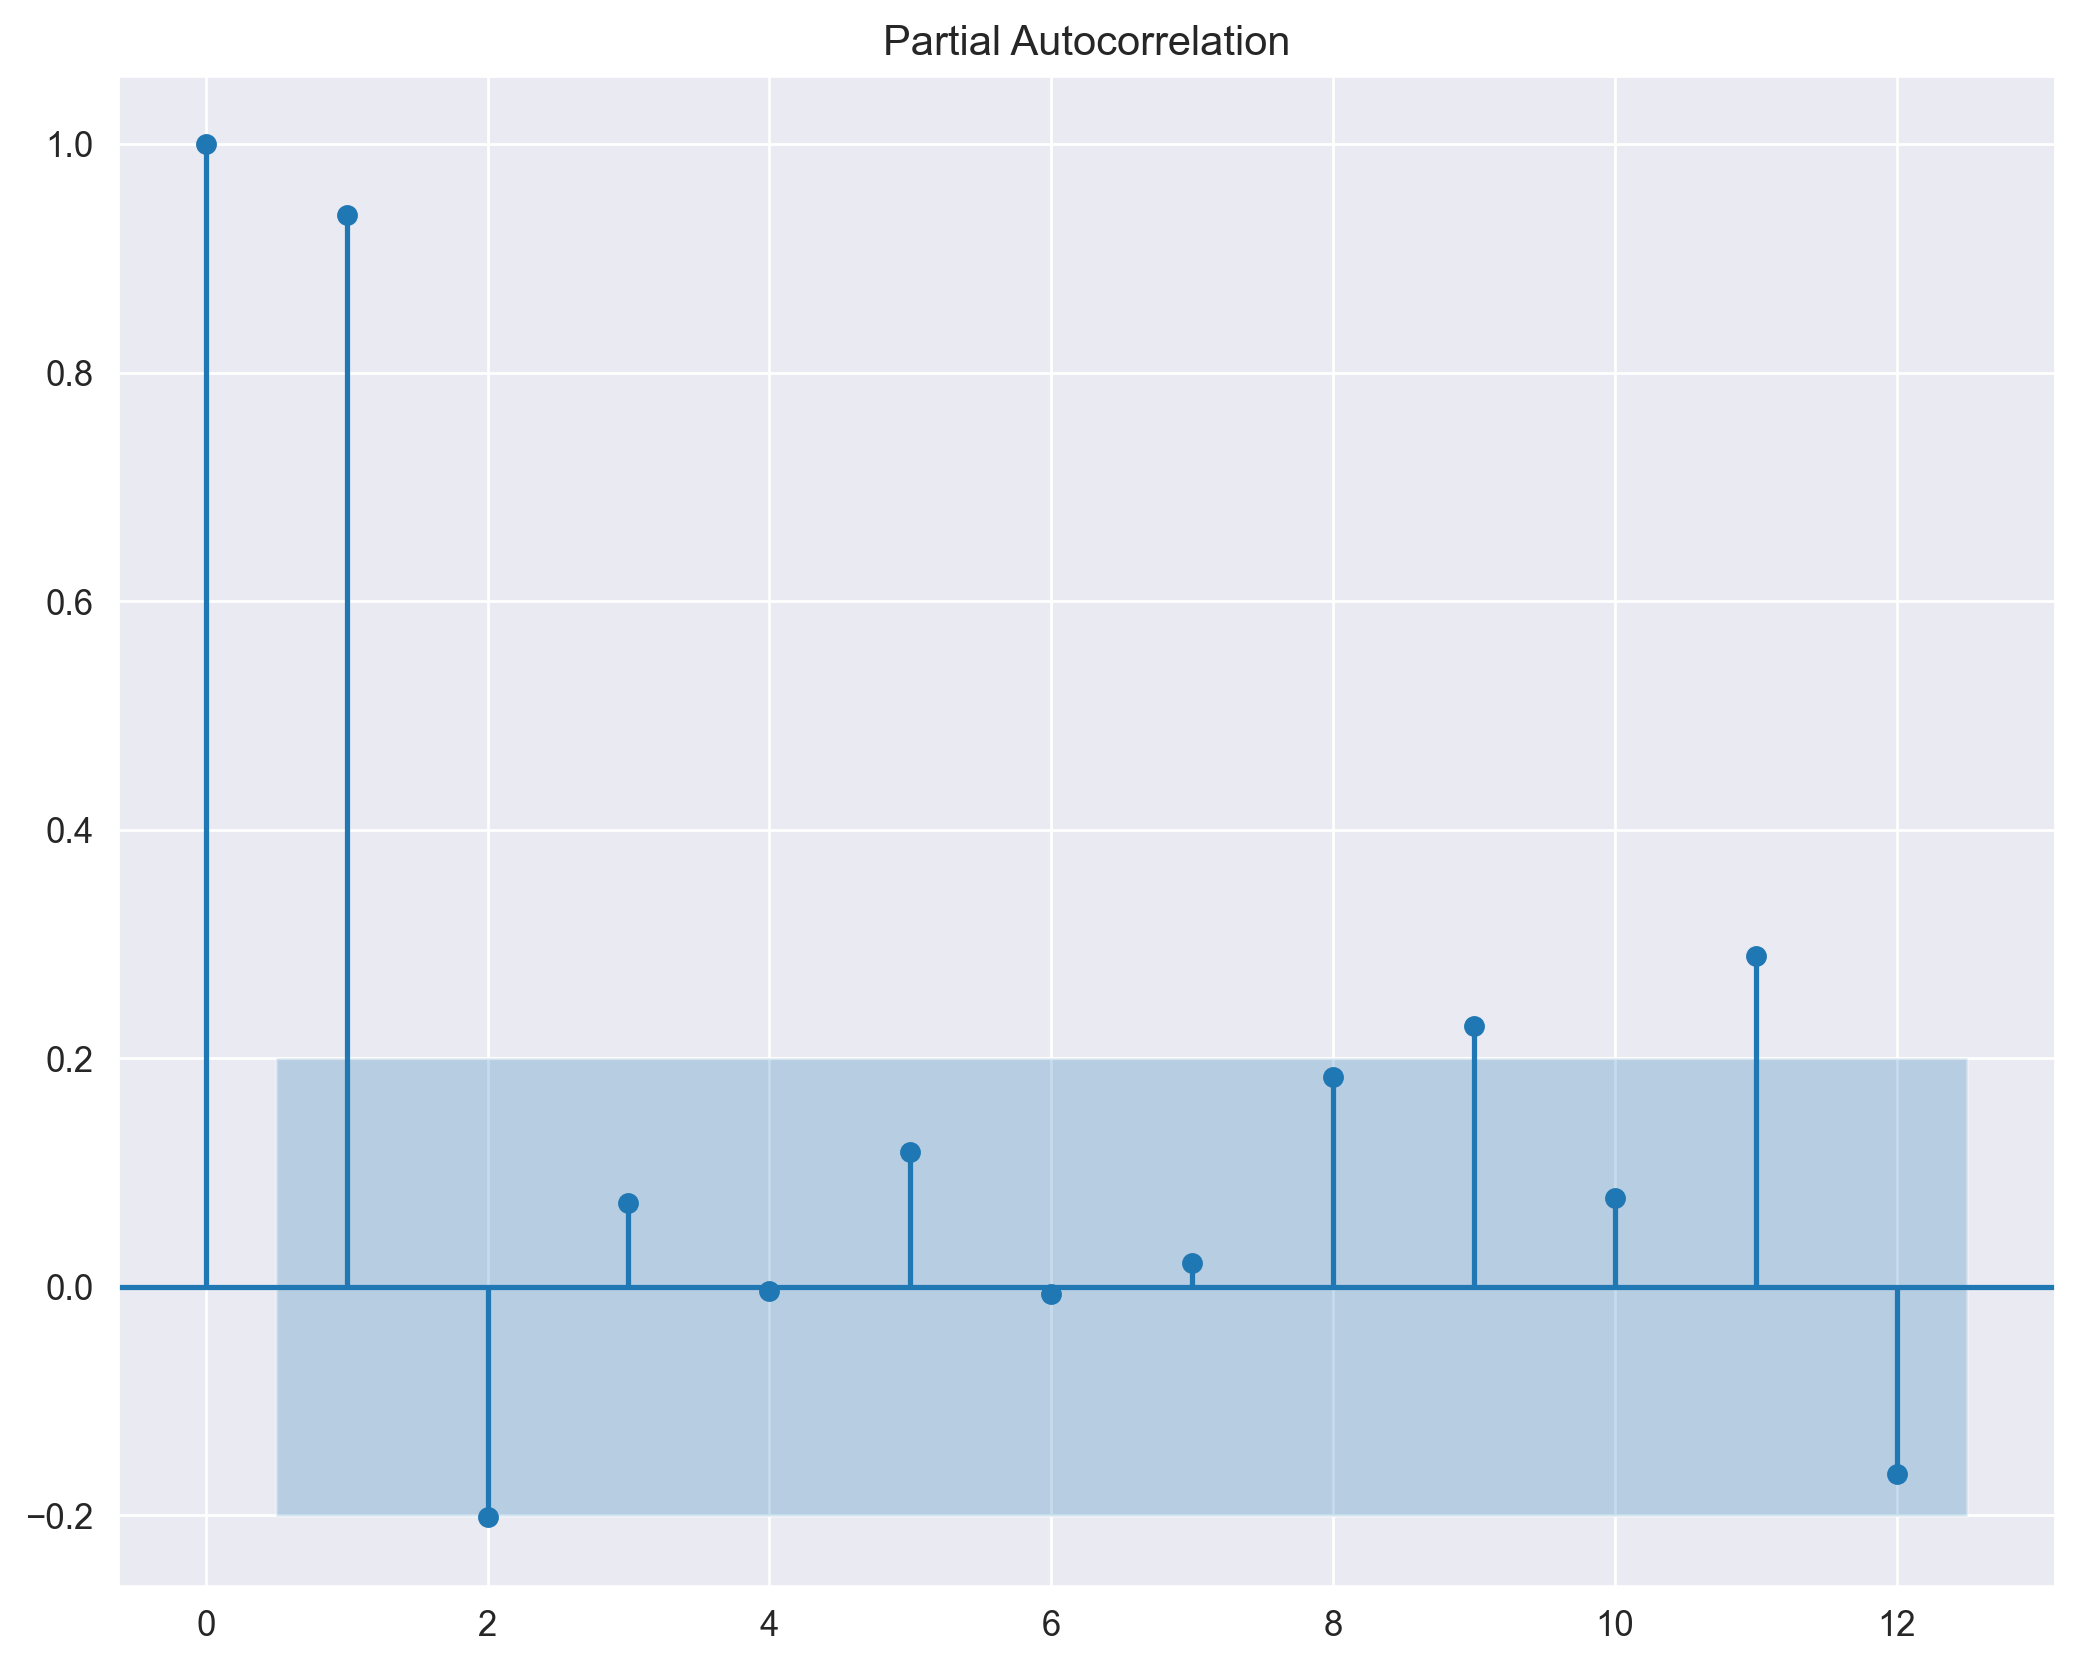

In [93]:
tsa_plots.plot_acf(Airlines.Passengers,lags=12)
tsa_plots.plot_pacf(Airlines.Passengers,lags=12)
plt.show()

In [95]:
Airlines["t"] = np.arange(1,97)
Airlines["t_squared"] = Airlines["t"]*Airlines["t"]

Airlines["log_Passengers"] = np.log(Airlines["Passengers"])

Airlines.head()

,Month,Passengers,month,year,t,t_squared,log_Passengers
0,1995-01-01,112,Jan,1995,1,1,4.718499
1,1995-02-01,118,Feb,1995,2,4,4.770685
2,1995-03-01,132,Mar,1995,3,9,4.882802
3,1995-04-01,129,Apr,1995,4,16,4.859812
4,1995-05-01,121,May,1995,5,25,4.795791


## Splitting the data

In [96]:
Train = Airlines.head(84)
Test = Airlines.tail(12)

In [97]:
Train

,Month,Passengers,month,year,t,t_squared,log_Passengers
0,1995-01-01,112,Jan,1995,1,1,4.718499
1,1995-02-01,118,Feb,1995,2,4,4.770685
2,1995-03-01,132,Mar,1995,3,9,4.882802
3,1995-04-01,129,Apr,1995,4,16,4.859812
4,1995-05-01,121,May,1995,5,25,4.795791
...,...,...,...,...,...,...,...
79,2001-08-01,347,Aug,2001,80,6400,5.849325
80,2001-09-01,312,Sep,2001,81,6561,5.743003
81,2001-10-01,274,Oct,2001,82,6724,5.613128
82,2001-11-01,237,Nov,2001,83,6889,5.468060


In [98]:
Test

,Month,Passengers,month,year,t,t_squared,log_Passengers
84,2002-01-01,284,Jan,2002,85,7225,5.648974
85,2002-02-01,277,Feb,2002,86,7396,5.624018
86,2002-03-01,317,Mar,2002,87,7569,5.758902
87,2002-04-01,313,Apr,2002,88,7744,5.746203
88,2002-05-01,318,May,2002,89,7921,5.762051
89,2002-06-01,374,Jun,2002,90,8100,5.924256
90,2002-07-01,413,Jul,2002,91,8281,6.023448
91,2002-08-01,405,Aug,2002,92,8464,6.003887
92,2002-09-01,355,Sep,2002,93,8649,5.872118
93,2002-10-01,306,Oct,2002,94,8836,5.723585


## Model based Forecasting methods

In [100]:
#Linear Model

linear_model1 = smf.ols('Passengers~t',data=Train).fit()
pred_linear1 =  pd.Series(linear_model1.predict(pd.DataFrame(Test['t'])))
rmse_linear1 = np.sqrt(mean_squared_error(Test['Passengers'], pred_linear1))
rmse_linear1

53.199236534802715

In [101]:
#Exponential

Exp1 = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp1 = pd.Series(Exp1.predict(pd.DataFrame(Test['t'])))
rmse_Exp1 = np.sqrt(mean_squared_error(Test['Passengers'], pred_Exp1))
rmse_Exp1

325.7150613551535

In [102]:
#Quadratic 

Quad1 = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad1 = pd.Series(Quad1.predict(Test[["t","t_squared"]]))
rmse_Quad1 = np.sqrt(mean_squared_error(Test['Passengers'],pred_Quad1))
rmse_Quad1

48.051888979330975

In [107]:
#Compare the results 

data1 = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad])}
table_rmse1=pd.DataFrame(data1)
table_rmse1.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
2,rmse_Quad,457.735736
0,rmse_linear,752.923393
1,rmse_Exp,4387.940545


## Moving Average

<AxesSubplot:>

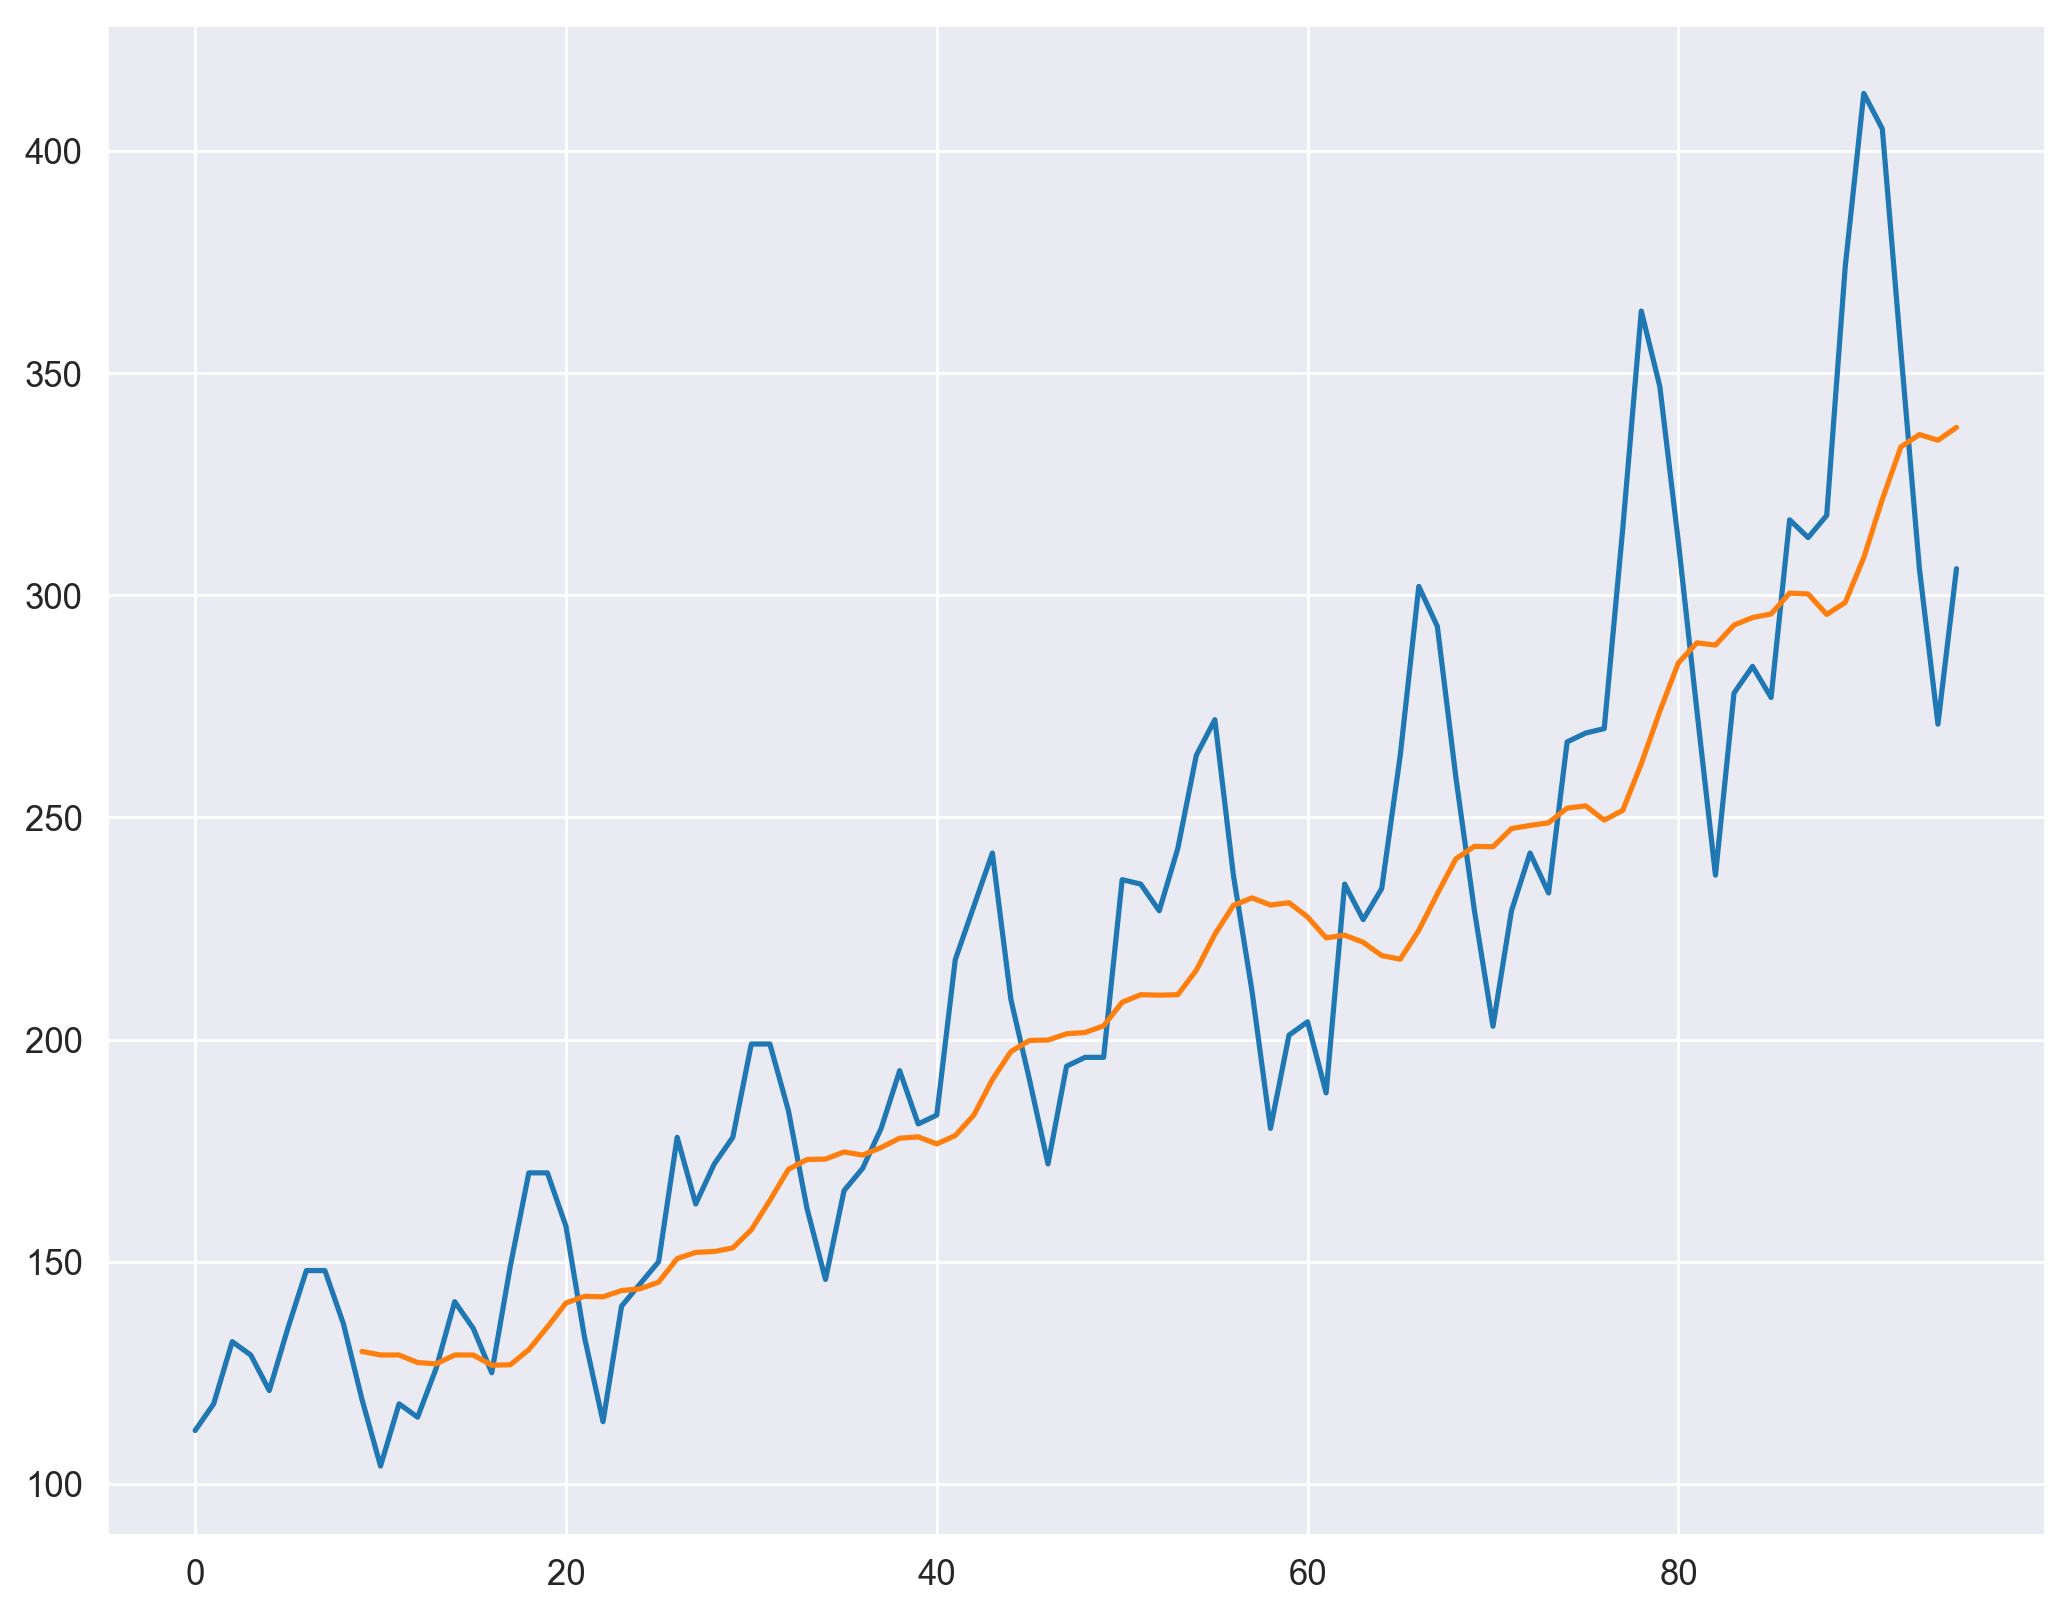

In [108]:
Airlines['Passengers'].plot()
Airlines['Passengers'].rolling(10).mean().plot()

## Building final model with least RMSE value

In [109]:
final_model1 = smf.ols('Passengers~t+t_squared',data=Airlines).fit()
pred_final1 = pd.Series(final_model1.predict(Airlines[['t','t_squared']]))
rmse_final_model1 = np.sqrt(mean_squared_error(Airlines['Passengers'], pred_final1))
rmse_final_model1

29.59097162530025

In [110]:
pred_df1 = pd.DataFrame({'Actual' : Airlines.Passengers, 'Predicted' : pred_final1})
pred_df1

,Actual,Predicted
0,112,119.158137
1,118,120.460303
2,132,121.784439
3,129,123.130544
4,121,124.498617
...,...,...
91,405,327.618598
92,355,330.919950
93,306,334.243270
94,271,337.588559
